In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


# Checking the Data

In [4]:
data.shape

(4269, 13)

In [5]:
data.size

55497

In [6]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### 1) What are the names and data types of the column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


There are no duliacte values in the loan_id.

### 2) Do you have domain clarification? Brief it

$Loan approval$ is the process by which a lender or a bank decides whether or not to grant a loan to a borrower. The lender will typically consider a number of factors, including the borrower's credit history, income, debt-to-income ratio, and collateral.<br>

The loan approval process typically involves the following steps:<br>

$Application:$ The borrower submits a loan application to the lender or a bank. The application will typically include information about the borrower's financial situation, such as their income, debt, and assets.<br>

$Underwriting:$ The lender underwrites the loan application. This involves reviewing the borrower's credit history, income, and debt-to-income ratio to assess their risk of defaulting on the loan.<br>

$Approval:$ The lender approves or denies the loan application. If the loan is approved, the lender will typically make an offer to the borrower with the terms and conditions of the loan.<br>

$Closing:$ If the borrower accepts the lender's offer, they will sign a loan agreement and the loan will be closed. The lender will then disburse the loan funds to the borrower.<br>

The loan approval process can be relatively quick and easy for borrowers with good credit and a low debt-to-income ratio. However, the process can be more complex and time-consuming for borrowers with bad credit or a high debt-to-income ratio.

### 3) Data Description

    loan_id                   : Each person has their unique own loan_id.
    
    no_of_dependents          : How many persons are depneding on him/her.
    
    Education                 : Tells weather the person is Graduate or not.
    
    self_employeed            : Does the person is self_employeed or dependent on someone else.
    
    income_annum              : Tells how much does a person earns annally.

    loan_amount               : The amount taken from the bank.
    
    loan_term                 : Time given by the person to repay the loan (or) 
                                The length of the time it take to be paid off completly by the borrower.
                                
    Cibil_score               : It is a three-digit numeric summary of a persons credit history.
                                If it is above 750 then there is have higher chance of approving the loan.
                                
    residential_assets_value  : It refers to the assessed or appraised value of a residential property
                                that is being used as collateral for the loan. This value plays a crucial role in 
                                the lending process, particularly for mortgage loans or home equity loans, where the 
                                property itself serves as security for the loan.
                                
    commercial_assets_value   : It refers to the assessed or appraised value of commercial property or assets that 
                                are being used as collateral for a loan. Commercial assets can include properties 
                                such as office buildings, retail spaces, industrial warehouses, hotels, and other
                                non-residential real estate.
                                
    luxury_assets_value       : refers to the assessed or appraised value of high-end, luxury items that are 
                                being considered as collateral for a loan. These luxury assets can include items 
                                such as luxury cars, yachts, fine art, collectibles, high-end jewelry, and other 
                                valuable possessions.
                                
    bank_asset_value          : It refers to the value of assets held by the borrower within their bank accounts.
                                It specifically pertains to the funds and other financial assets held in the 
                                borrower's bank accounts.

    loan_status               : It tells weather the laon has been approved or not

### 4) What is the target variable?

Target Variable is  $'Loan Status'$.<br> 
We are interseted in finding how a loans are getting approved or rejected?

### 5) What are the units of measurement for numerical columns?


In [9]:
numerical_columns = data.select_dtypes(include=np.number).columns
print(numerical_columns)

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


- 'loan_id = None' 
- no_of_dependents = None
- income_annum = Currency
- loan_amount = Currency
- loan_term = Years
- cibil_score = Credit Score
- residential_assets_value = Currency
- commercial_assets_value = Currency
- luxury_assets_value = Currency
- bank_asset_value = Currency 

### Checking what are the unique values present in catagorical columns

In [10]:
data['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [11]:
data['education']=data['education'].apply(lambda x: x.lstrip(" "))
data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
data['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [13]:
data['self_employed']=data['self_employed'].apply(lambda x: x.lstrip(" "))
data['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [15]:
data['loan_status']=data['loan_status'].apply(lambda x: x.lstrip(" "))
data['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

There is some space before every element. Since they are catogorical columns no need to worry about that space. But it is better to remove that space.

### 6) Checking if there are any Missing values 

In [16]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There are no null values in any columns 

In [17]:
# Checking if there are any duplicate values in the loan_id
data["loan_id"].duplicated().sum()

0

no loan id is dupplicated

 ## 4) Outliers

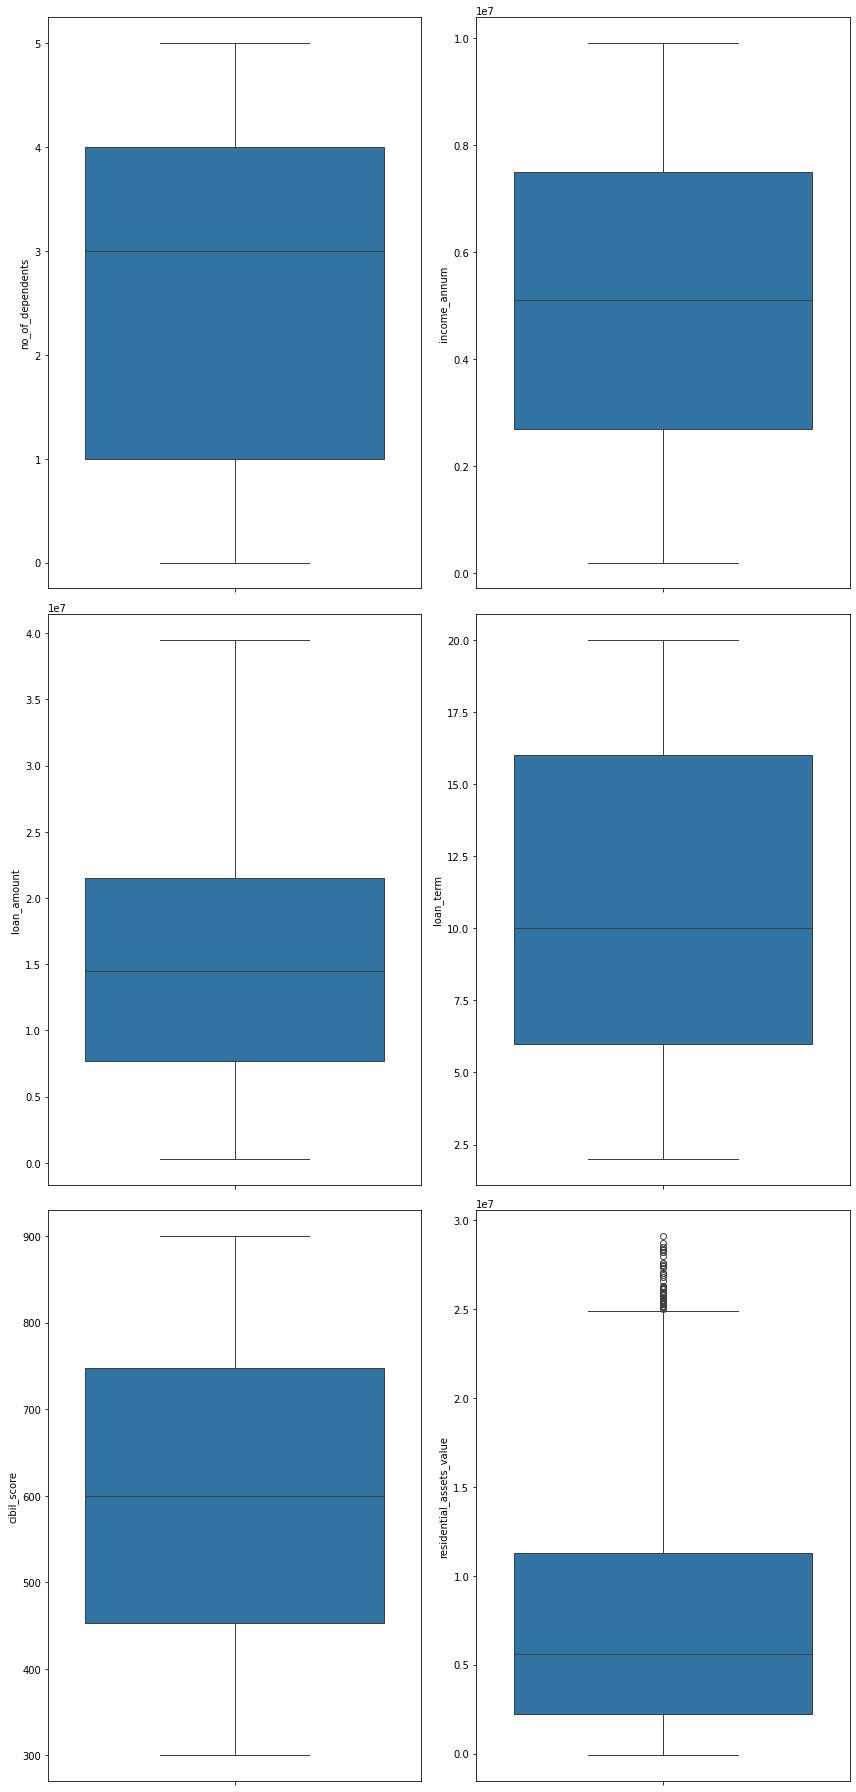

In [18]:
# Box plot for each numarical columns present in my datset

plt.figure(figsize=(12,25))

plt.subplot(3,2,1)
sb.boxplot(data.no_of_dependents)

plt.subplot(3,2,2)
sb.boxplot(data.income_annum)

plt.subplot(3,2,3)
sb.boxplot(data.loan_amount)

plt.subplot(3,2,4)
sb.boxplot(data.loan_term)

plt.subplot(3,2,5)
sb.boxplot(data.cibil_score)

plt.subplot(3,2,6)
sb.boxplot(data.residential_assets_value)

plt.tight_layout()
plt.show()

<Axes: ylabel='bank_asset_value'>

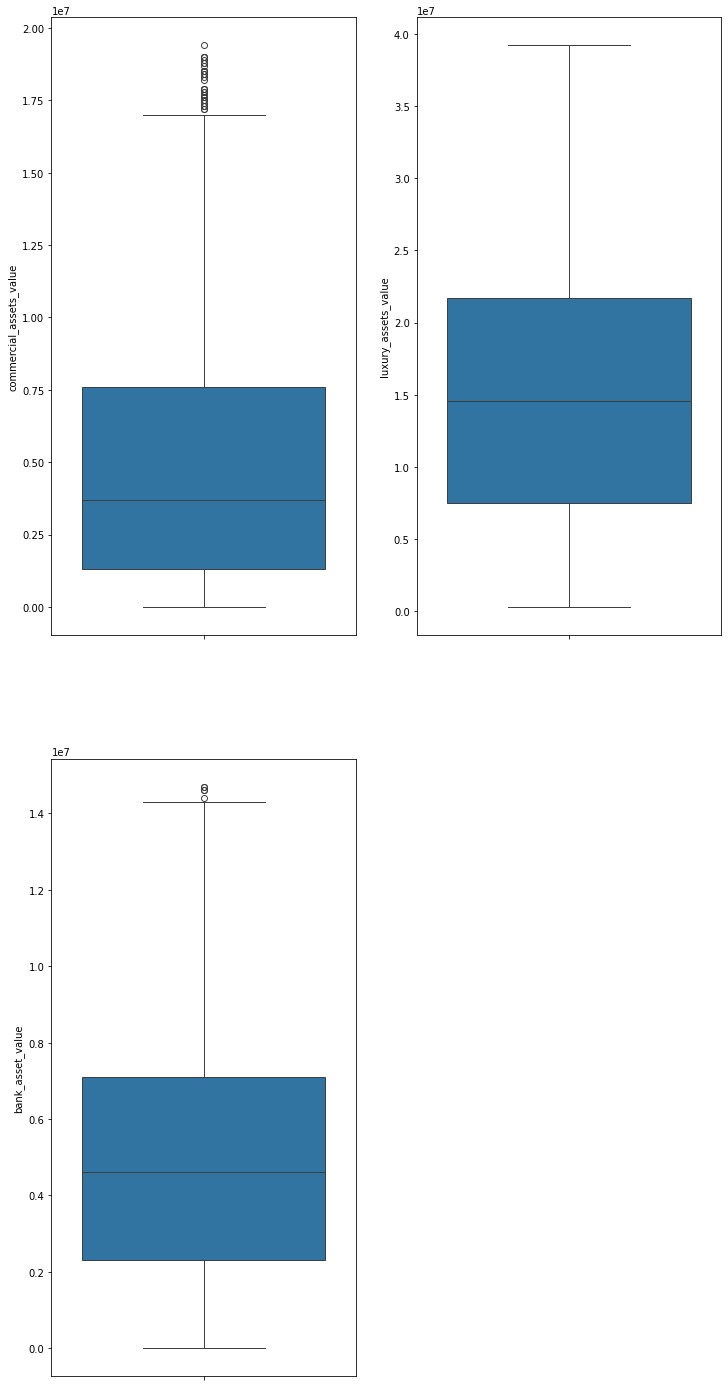

In [19]:
plt.figure(figsize=(12,25))
plt.subplot(2,2,1)
sb.boxplot(data.commercial_assets_value)


plt.subplot(2,2,2)
sb.boxplot(data.luxury_assets_value)


plt.subplot(2,2,3)
sb.boxplot(data.bank_asset_value)

- There are outliers in residential assests values, commersial assets value and bank assests value.
- But these outliers are not because of data entry or any other reason. These are genune. so these are not changed.

- Therefore Data Set is cleaned

In [20]:
sorted_commercial = np.sort(data.commercial_assets_value)
Q1 = np.percentile(sorted_commercial,25)
Q3 = np.percentile(sorted_commercial,75)
IQR = Q3 - Q1
print(IQR)
print(np.percentile(sorted_commercial,85))
print(np.percentile(sorted_commercial,90))
print(np.percentile(sorted_commercial,95))
print(np.percentile(sorted_commercial,97))
print(np.percentile(sorted_commercial,99))
print(np.percentile(sorted_commercial,99.99))

6300000.0
10079999.999999972
11700000.0
13900000.0
15296000.000000004
16731999.99999997
19229279.999999925


##### We can see that from the 90 percentile to 99.99 percentile the data keeps gradually increasing there is no such thing  that data has jumped drastically. So we can conclude that they are not outliers. They are valid data.

# Univariant analysis

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## 1. How many people are Graduated and Non-Graduate (EDUCATION COL)

In [22]:
# finding how much percent of people are GRADUATE AND NON-GRADUATE
No_grad =data['education'].value_counts(normalize=True).mul(100).reset_index() 
No_grad

,education,proportion
0,Graduate,50.222535
1,Not Graduate,49.777465


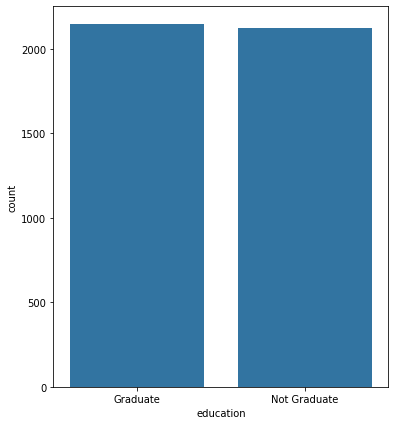

In [23]:
plt.figure(figsize=(6,7))
sb.countplot(data=data,x='education') # Visuvalising the above details.
plt.show()

- Graduate people are slighlty more than non-graduate people

## 2. How many people are  self Employeed and non self employeed

In [24]:
# finding how much percent of people are SELF-EMPLOYEED AND NON-SELF-EMPLOYEED
no_self = data['self_employed'].value_counts(normalize=True).mul(100).reset_index()
no_self

,self_employed,proportion
0,Yes,50.363083
1,No,49.636917


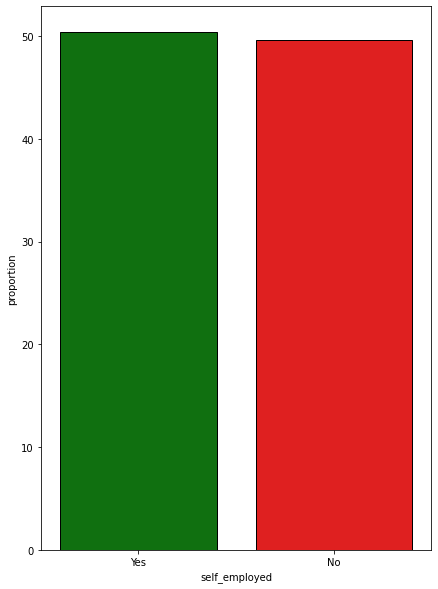

In [25]:
plt.figure(figsize=(7,10))
# Barplot for representing persentage of people falling under self_employed and non-self_employed catogery
sb.barplot(data =no_self,x = no_self['self_employed'],y = no_self['proportion'],edgecolor='black',
           hue='self_employed',palette=['green','red'])
plt.show()


- Number of people with self empyled if slightly greater than non self employed.

## 3. How many loans are approved and dis-approved

In [26]:
# finding how much percent of loans are Approved AND Rejected
no_approves = data['loan_status'].value_counts(normalize=True).mul(100).reset_index()
no_approves


,loan_status,proportion
0,Approved,62.215976
1,Rejected,37.784024


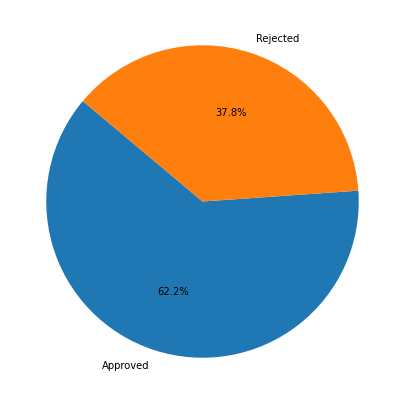

In [27]:
plt.figure(figsize=(7,10))
# PIECHART for representing percentage of loans approved and rejected.
plt.pie(no_approves['proportion'], labels=no_approves['loan_status'], autopct='%1.1f%%', startangle=140)
plt.show()

- Appoved loan are greater than rejected loans

## Annual Income

### Mean

In [28]:
income_mean = round(data['income_annum'].mean(),2)
income_mean

5059123.92

### Median

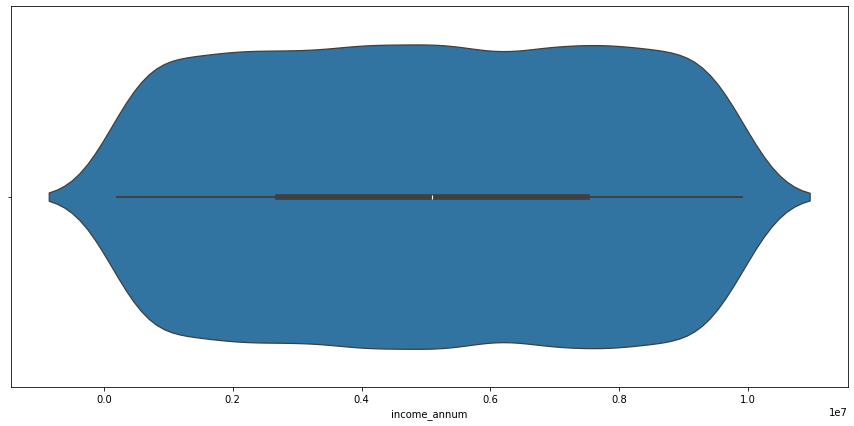

In [29]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['income_annum'],orient='h')
plt.show()

### Distribution

In [30]:
alpha = 0.05

# Checking normal distribution
statistic, p_value = stats.shapiro(data['income_annum'])
is_normal = p_value > alpha
if is_normal:
  print("Is a normal distribution")
else:
  print("Is not a normal distribution")

# Checking lognormal distribution
fit = stats.lognorm.fit(data['income_annum'])
ks_statistic, p_value = stats.kstest(data['income_annum'], 'lognorm', args=fit)
is_lognormal = p_value > alpha
if is_lognormal:
  print("Is a lognormal distribution")
else:
  print("Is not a lognormal distribution")

# Checking exponential distribution
fit = stats.expon.fit(data['income_annum'])
ks_statistic, p_value = stats.kstest(data['income_annum'], 'expon', args=fit, alternative='greater')
is_exponential = p_value > alpha
if is_exponential:
  print("Is an exponential distribution")
else:
  print("Is not an exponential distribution")

# Checking Weibull distribution
c, loc, scale = stats.weibull_min.fit(data['income_annum'])
ks_statistic, p_value = stats.kstest(data['income_annum'], 'weibull_min', args=(c, loc, scale))
is_weibull = p_value > alpha
if is_weibull:
  print("Is a Weibull distribution")
else:
  print("Is not a Weibull distribution")


Is not a normal distribution
Is not a lognormal distribution
Is not an exponential distribution
Is not a Weibull distribution


##### Income_annum is not follwing any distribution

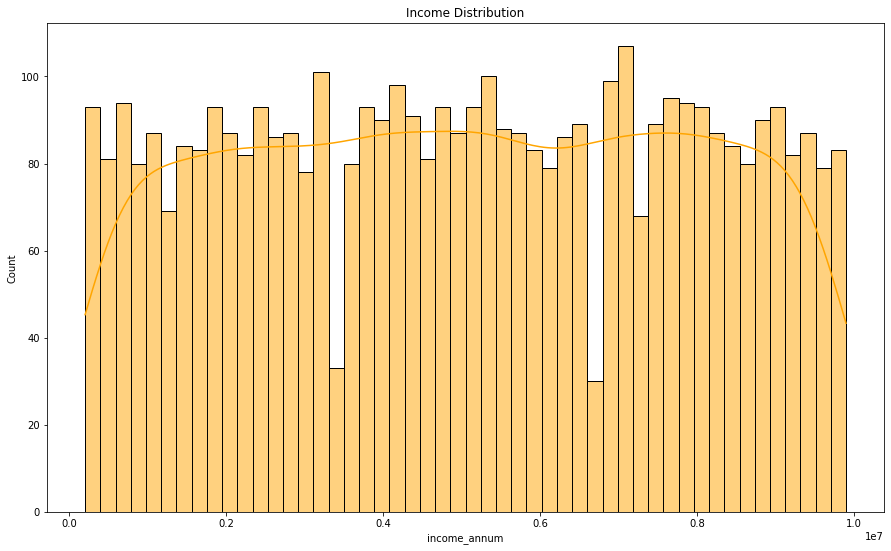

In [31]:
# Finding how Annual income of people is distributed
plt.figure(figsize=(15,9))
sb.histplot(data=data, bins=50, x="income_annum", kde=True,color="orange") 
plt.title("Income Distribution")
plt.show()

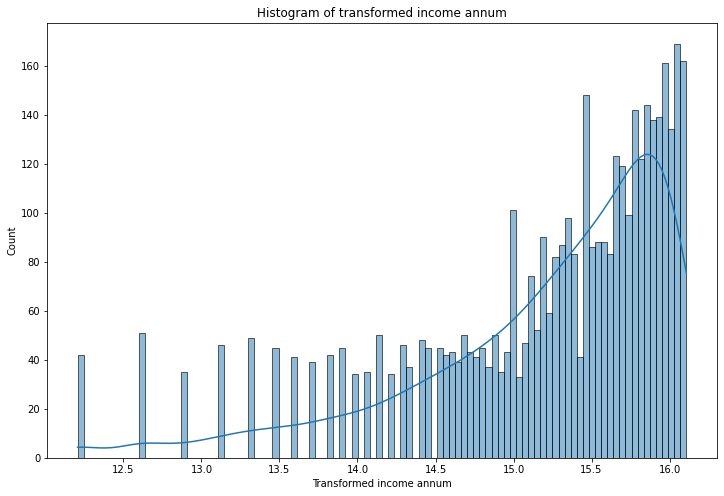

In [32]:
# Load the loan amount data
loan_amounts = data['income_annum']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed income annum")
plt.ylabel("Count")
plt.title("Histogram of transformed income annum")
plt.show()




                                     annual income is uniformly distrabuted

## Loan amount

### Mean

In [33]:
loan_mean = round(data['loan_amount'].mean(),2)
loan_mean

15133450.46

### Median

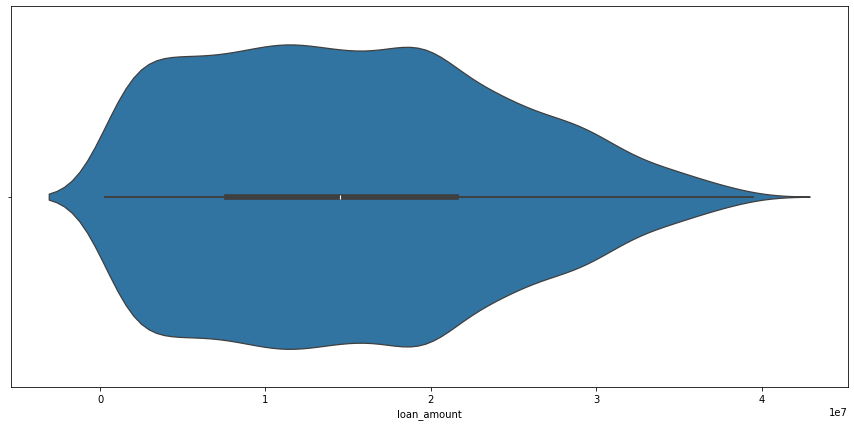

In [34]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['loan_amount'],orient='h')
plt.show()

### Distribution

In [35]:
alpha = 0.05

# Checking normal distribution
statistic, p_value = stats.shapiro(data['loan_amount'])
is_normal = p_value > alpha
if is_normal:
    print("Is a normal distribution")
else:
    print("Is not a normal distribution")

# Checking lognormal distribution
fit = stats.lognorm.fit(data['loan_amount'])
ks_statistic, p_value = stats.kstest(data['loan_amount'], 'lognorm', args=fit)
is_lognormal = p_value > alpha
if is_lognormal:
    print("Is a lognormal distribution")
else:
    print("Is not a lognormal distribution")

# Checking exponential distribution
fit = stats.expon.fit(data['loan_amount'])
ks_statistic, p_value = stats.kstest(data['loan_amount'], 'expon', args=fit, alternative='greater')
is_exponential = p_value > alpha
if is_exponential:
  print("Is an exponential distribution")
else:
  print("Is not an exponential distribution")

# Checking Weibull distribution
c, loc, scale = stats.weibull_min.fit(data['loan_amount'])
ks_statistic, p_value = stats.kstest(data['loan_amount'], 'weibull_min', args=(c, loc, scale))
is_weibull = p_value > alpha
if is_weibull:
  print("Is a Weibull distribution")
else:
  print("Is not a Weibull distribution")


Is not a normal distribution
Is not a lognormal distribution
Is not an exponential distribution
Is not a Weibull distribution


##### loan_amount is not follwing any distribution

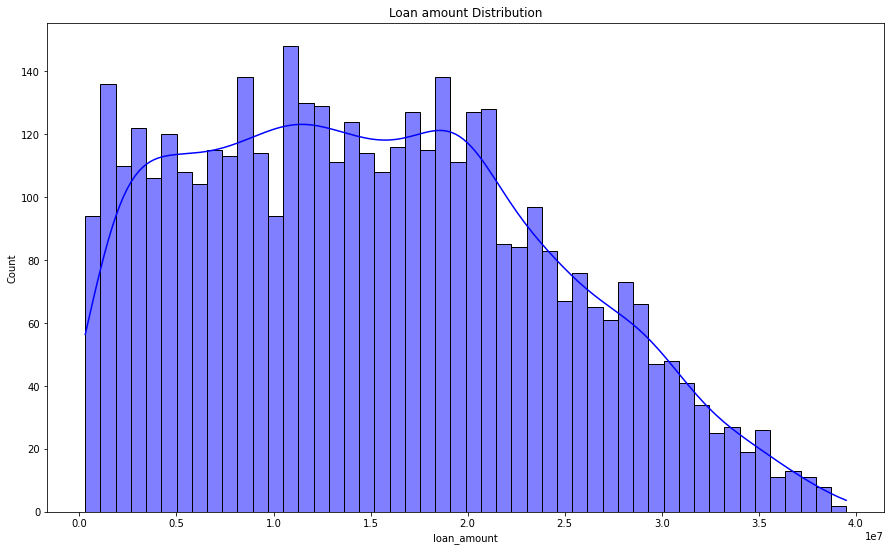

In [36]:
plt.figure(figsize=(15,9))
sb.histplot(data=data, bins=50, x="loan_amount", kde=True,color="blue") 
plt.title("Loan amount Distribution")
plt.show()

#####  - The histogram is slightly skewed to the left, meaning that there are more loans with smaller amounts than there are loans with larger amounts.

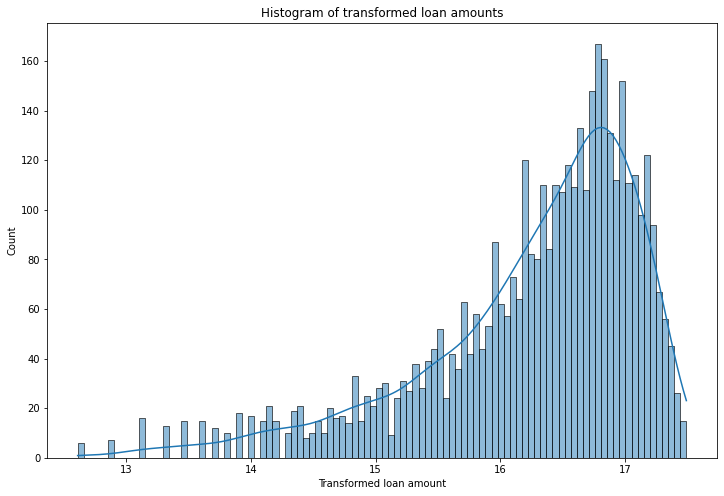

In [37]:
# Load the loan amount data
loan_amounts = data['loan_amount']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed loan amount")
plt.ylabel("Count")
plt.title("Histogram of transformed loan amounts")
plt.show()

#  loan term

### Mean

In [38]:
data['loan_term'].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

In [39]:
term_mean = data['loan_term'].mean()
term_mean

10.900445069102835

### Median

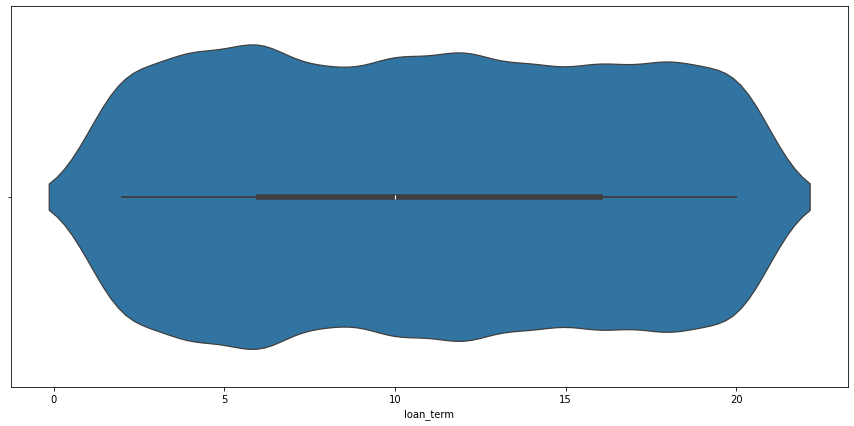

In [40]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['loan_term'],orient='h')
plt.show()

### Distrabution

In [41]:
alpha = 0.05

# Checking normal distribution
statistic, p_value = stats.shapiro(data['loan_term'])
is_normal = p_value > alpha
if is_normal:
  print("Is a normal distribution")
else:
  print("Is not a normal distribution")

# Checking lognormal distribution
fit = stats.lognorm.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'lognorm', args=fit)
is_lognormal = p_value > alpha
if is_lognormal:
  print("Is a lognormal distribution")
else:
  print("Is not a lognormal distribution")

# Checking exponential distribution
fit = stats.expon.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'expon', args=fit, alternative='greater')
is_exponential = p_value > alpha
if is_exponential:
  print("Is an exponential distribution")
else:
  print("Is not an exponential distribution")

# Checking Weibull distribution
c, loc, scale = stats.weibull_min.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'weibull_min', args=(c, loc, scale))
is_weibull = p_value > alpha
if is_weibull:
  print("Is a Weibull distribution")
else:
  print("Is not a Weibull distribution")


Is not a normal distribution
Is not a lognormal distribution
Is not an exponential distribution
Is not a Weibull distribution


##### loan_term is not follwing any distribution

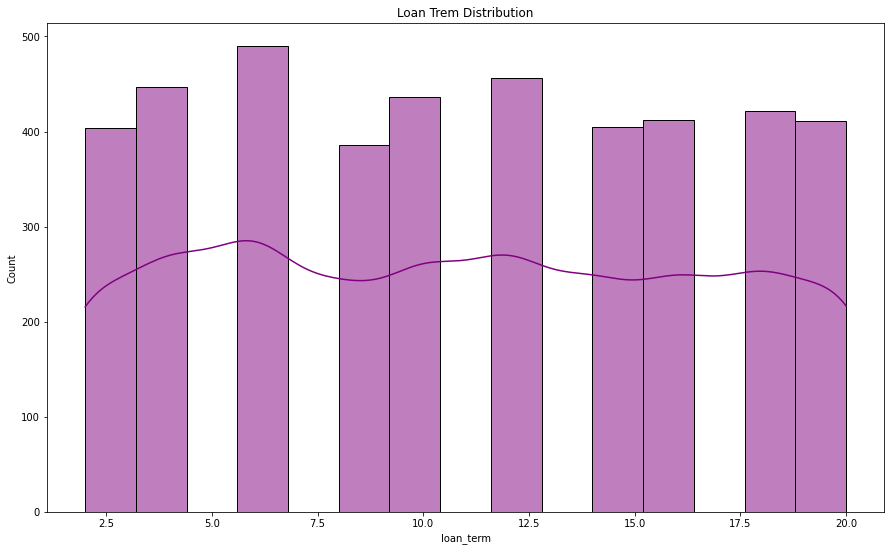

In [42]:
plt.figure(figsize=(15,9))
sb.histplot(data=data, x="loan_term", kde=True,color="purple") 
plt.title("Loan Trem Distribution")
plt.show()

#####  we can observe that the average loan term has been increasing over time. This means that borrowers are increasingly taking out loans with longer repayment periods.

### How many loans are going to clear for each term

<Axes: xlabel='loan_term', ylabel='count'>

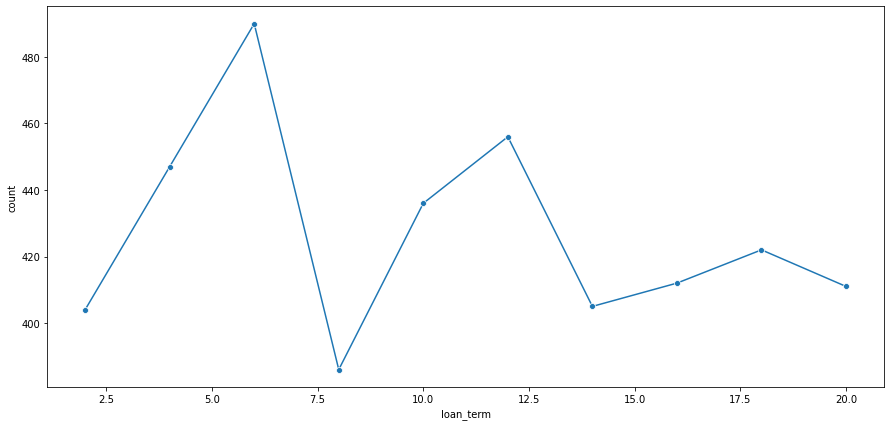

In [43]:
term = data['loan_term'].value_counts().reset_index()
plt.figure(figsize=(15,7))
sb.lineplot(x=term['loan_term'], y=term['count'], marker='o')

## Cibil Score

### Mean

In [44]:
cibil_mean = data['cibil_score'].mean()
cibil_mean

599.9360505973295

### Median

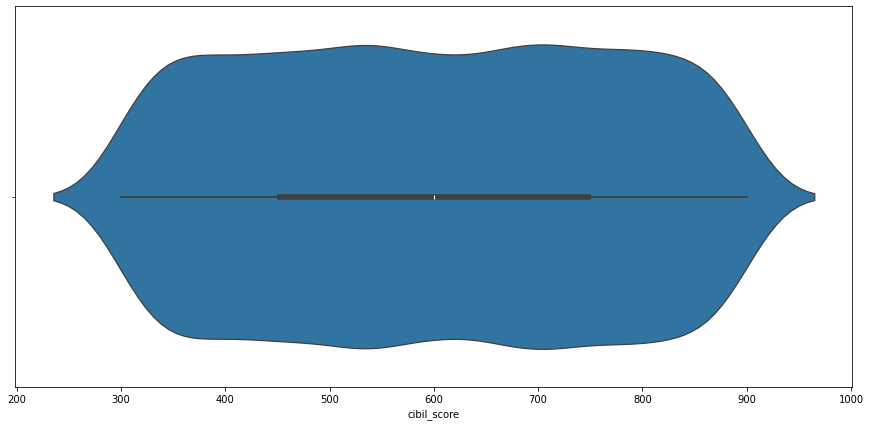

In [45]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['cibil_score'],orient='h')
plt.show()

### Distribution

In [46]:
alpha = 0.05

# Checking normal distribution
statistic, p_value = stats.shapiro(data['cibil_score'])
is_normal = p_value > alpha
if is_normal:
    print("Is a normal distribution")
else:
    print("Is not a normal distribution")

# Checking lognormal distribution
fit = stats.lognorm.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'lognorm', args=fit)
is_lognormal = p_value > alpha
if is_lognormal:
    print("Is a lognormal distribution")
else:
    print("Is not a lognormal distribution")

# Checking exponential distribution
fit = stats.expon.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'expon', args=fit, alternative='greater')
is_exponential = p_value > alpha
if is_exponential:
    print("Is an exponential distribution")
else:
    print("Is not an exponential distribution")

# Checking Weibull distribution
c, loc, scale = stats.weibull_min.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'weibull_min', args=(c, loc, scale))
is_weibull = p_value > alpha
if is_weibull:
    print("Is a Weibull distribution")
else:
    print("Is not a Weibull distribution")


Is not a normal distribution
Is not a lognormal distribution
Is not an exponential distribution
Is not a Weibull distribution


##### cibil_score is not follwing any distribution

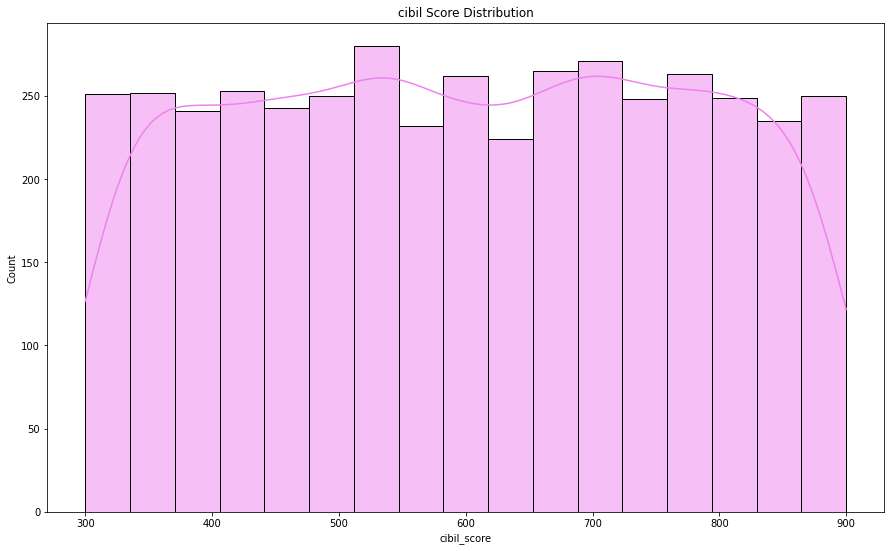

In [47]:
plt.figure(figsize=(15,9))
sb.histplot(data=data, x="cibil_score", kde=True,color="violet") 
plt.title("cibil Score Distribution")
plt.show()

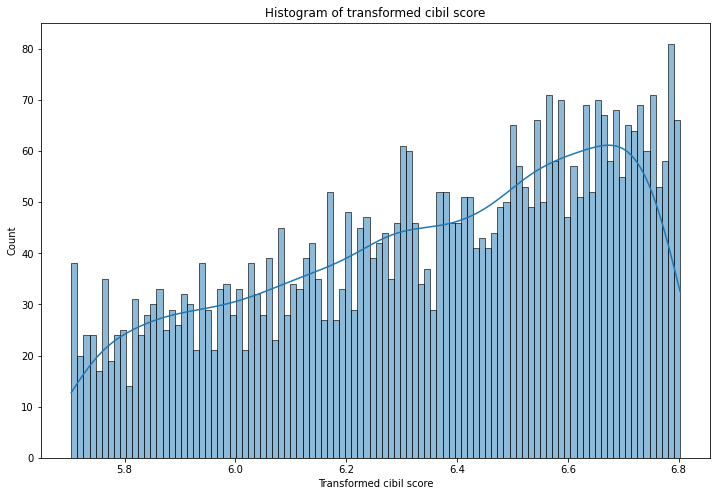

In [48]:
# Load the loan amount data
loan_amounts = data['cibil_score']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed cibil score")
plt.ylabel("Count")
plt.title("Histogram of transformed cibil score")
plt.show()

##### Cibil score is unifrormly distributed means people who applied for loans are  present in all range of the cibile socre.

<Axes: xlabel='cibil_score', ylabel='count'>

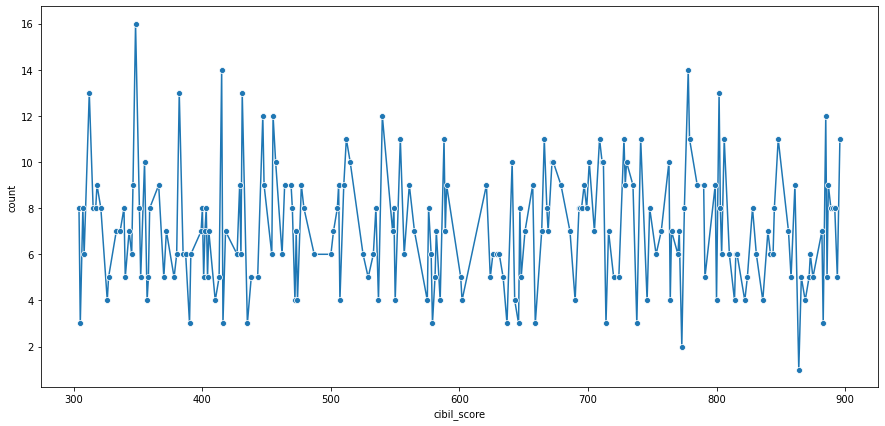

In [49]:
cibil = data['cibil_score'].value_counts().reset_index()
plt.figure(figsize=(15,7))
sb.lineplot(x=cibil['cibil_score'].iloc[::3], y=cibil['count'].iloc[::3], marker='o')

                                        Cibil Score is uniformly distrabuted.

## residential_assets_value

## Mean

In [50]:
residential_mean = round(data['residential_assets_value'].mean(),2)
residential_mean

7472616.54

### Median

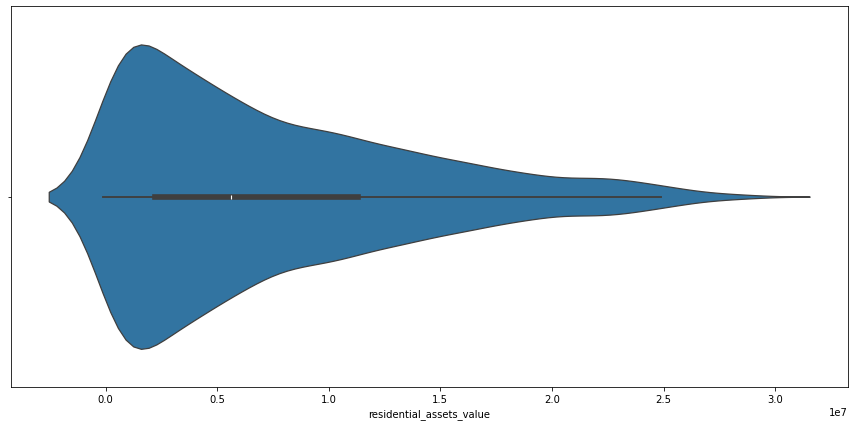

In [51]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['residential_assets_value'],orient='h')
plt.show()

### Distrabution

In [52]:
alpha = 0.05

# Checking normal distribution
statistic, p_value = stats.shapiro(data['residential_assets_value'])
is_normal = p_value > alpha
if is_normal:
  print("Is a normal distribution")
else:
  print("Is not a normal distribution")

# Checking lognormal distribution
fit = stats.lognorm.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'lognorm', args=fit)
is_lognormal = p_value > alpha
if is_lognormal:
    print("Is a lognormal distribution")
else:
    print("Is not a lognormal distribution")

# Checking exponential distribution
fit = stats.expon.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'expon', args=fit, alternative='greater')
is_exponential = p_value > alpha
if is_exponential:
    print("Is an exponential distribution")
else:
    print("Is not an exponential distribution")

# Checking Weibull distribution
c, loc, scale = stats.weibull_min.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'weibull_min', args=(c, loc, scale))
is_weibull = p_value > alpha
if is_weibull:
    print("Is a Weibull distribution")
else:
    print("Is not a Weibull distribution")


Is not a normal distribution
Is not a lognormal distribution
Is not an exponential distribution
Is not a Weibull distribution


##### residential_assets_value is not follwing any distribution

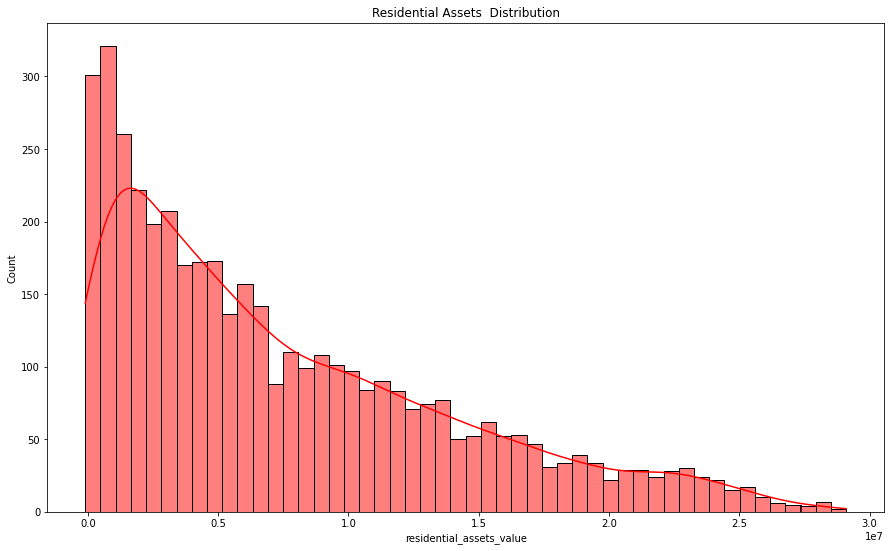

In [53]:
plt.figure(figsize=(15,9))
sb.histplot(data=data, bins=50, x="residential_assets_value", kde=True,color="red") 
plt.title("Residential Assets  Distribution")
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\karthik\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


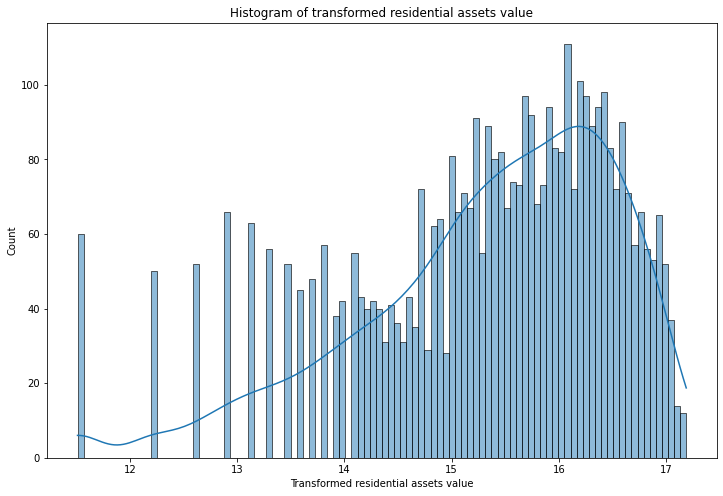

In [54]:
# Load the loan amount data
loan_amounts = data['residential_assets_value']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed residential assets value")
plt.ylabel("Count")
plt.title("Histogram of transformed residential assets value")
plt.show()

##### The histogram is skewed to the left, meaning that there are more loans with smaller ressidential assets amount than the loans with larger ressidential assets amounts.

# Commercial Assets Value

### Mean


In [55]:
comm_asst = round(data['commercial_assets_value'].mean(),2)
comm_asst

4973155.31

### Median

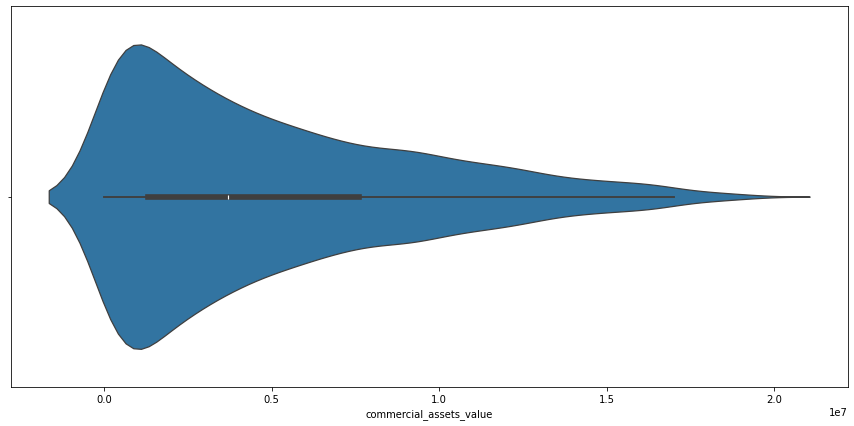

In [56]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['commercial_assets_value'],orient='h')
plt.show()

### Distrabution

In [57]:
alpha=0.05

# Checking normal distrabution
statistic, p_value = stats.shapiro(data['commercial_assets_value'])
is_normal = p_value > alpha
if is_normal:
    print("Is a Normal")
else:
    print(" is not an normal distrabtuion ")


# Checking logorthemic distrabution
fit = stats.lognorm.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'lognorm', args=fit)
is_log= p_value > alpha
if is_log:
    print("Is a logorthemic distrabution")
else:
    print(" is not an logorthemic distrabtuion ")

# Checking Exponential distrabution
fit = stats.expon.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'expon', args=fit, alternative='greater')
is_expo = p_value > alpha
if is_expo:
    print("Is a expo")
else:
    print(" is not an expo distrabtuion ")

    
# Checking weibull distrabution
c, loc, scale = stats.weibull_min.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'weibull_min', args=(c, loc, scale))
is_wei = p_value > alpha
if is_wei:
    print("Is a weibull")
else:
    print(" is not an weibull distrabtuion ")

    


 is not an normal distrabtuion 
 is not an logorthemic distrabtuion 
 is not an expo distrabtuion 
 is not an weibull distrabtuion 


##### commercial_assets_valu is not follwing any distrabution

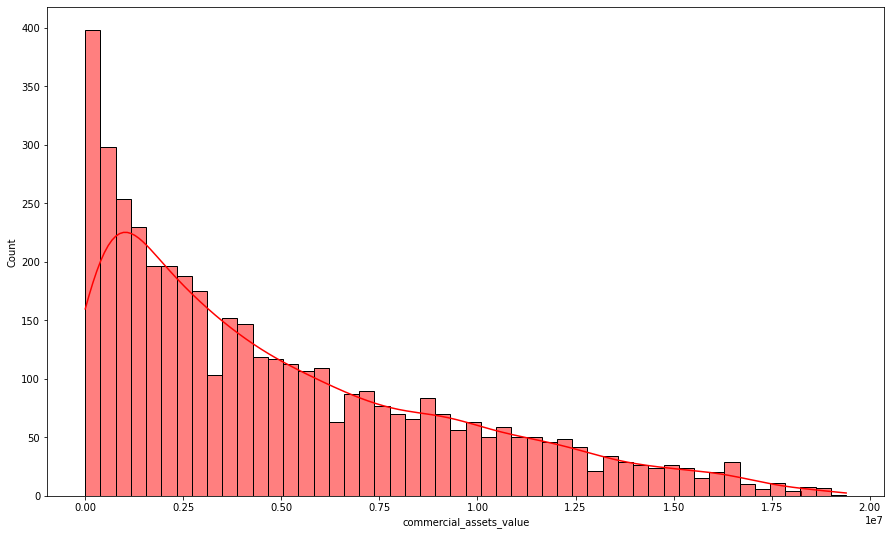

In [58]:
comm_asst = data['commercial_assets_value']
plt.figure(figsize=(15,9))
sb.histplot(data = comm_asst , bins =50,kde= True, color='red')
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


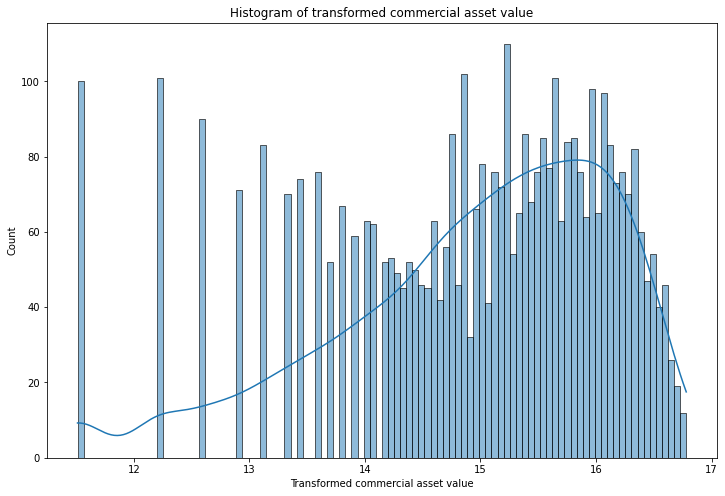

In [59]:
# Load the loan amount data
loan_amounts = data['commercial_assets_value']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed commercial asset value")
plt.ylabel("Count")
plt.title("Histogram of transformed commercial asset value")
plt.show()

##### The graph is skewed to the left, meaning that there are more commercial assets with lower amount than there are with higher amount. The graph also has a long tail, meaning that there are a few commercial assets with very high amount.

# Luxury Assets Value

### Mean

In [60]:
lux_asst = round(data['luxury_assets_value'].mean(),2)
lux_asst

15126305.93

### Median

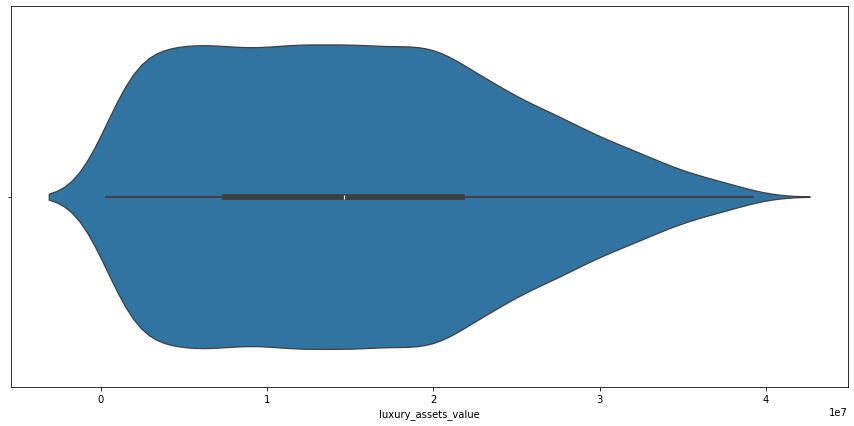

In [61]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['luxury_assets_value'],orient='h')
plt.show()

### Distribution

In [62]:
alpha=0.05

# Checking normal distrabution
statistic, p_value = stats.shapiro(data['luxury_assets_value'])
is_normal = p_value > alpha
if is_normal:
    print("Is a Normal")
else:
    print(" is not an normal distrabtuion ")


# Checking logorthemic distrabution
fit = stats.lognorm.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'lognorm', args=fit)
is_log= p_value > alpha
if is_log:
    print("Is a logorthemic distrabution")
else:
    print(" is not an logorthemic distrabtuion ")

# Checking Exponential distrabution
fit = stats.expon.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'expon', args=fit, alternative='greater')
is_expo = p_value > alpha
if is_expo:
    print("Is a expo")
else:
    print(" is not an expo distrabtuion ")

    
# Checking weibull distrabution
c, loc, scale = stats.weibull_min.fit(data['loan_term'])
ks_statistic, p_value = stats.kstest(data['loan_term'], 'weibull_min', args=(c, loc, scale))
is_wei = p_value > alpha
if is_wei:
    print("Is a weibull")
else:
    print(" is not an weibull distrabtuion ")

    


 is not an normal distrabtuion 
 is not an logorthemic distrabtuion 
 is not an expo distrabtuion 
 is not an weibull distrabtuion 


##### luxury_assets_value is not follwing any distrabution

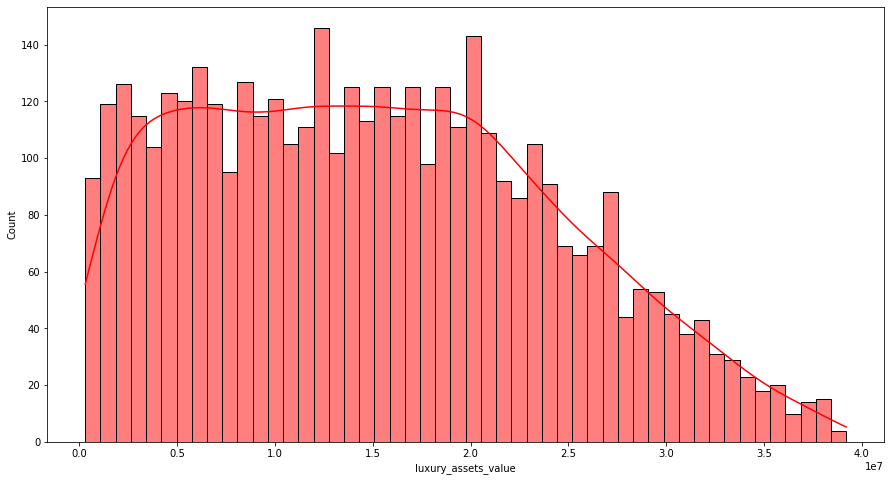

In [63]:
lux_asst = data['luxury_assets_value']
plt.figure(figsize=(15,8))
sb.histplot(data = lux_asst , bins =50,kde= True, color='red')

plt.show()

##### The graph is not skewed to either side, meaning that there are approximately equal numbers of luxury assets with lower and higher values. The graph also does not have a long tail, meaning that there are very few luxury assets with extremely high values.

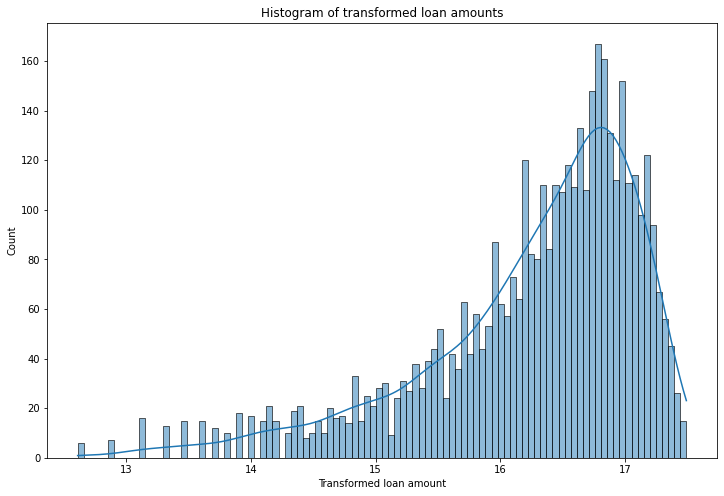

In [64]:
# Load the loan amount data
loan_amounts = data['loan_amount']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed loan amount")
plt.ylabel("Count")
plt.title("Histogram of transformed loan amounts")
plt.show()

# Bank Asset Value

### Mean

In [65]:
bank_asst = data['bank_asset_value']
round(bank_asst.mean(),2)

4976692.43

### Median

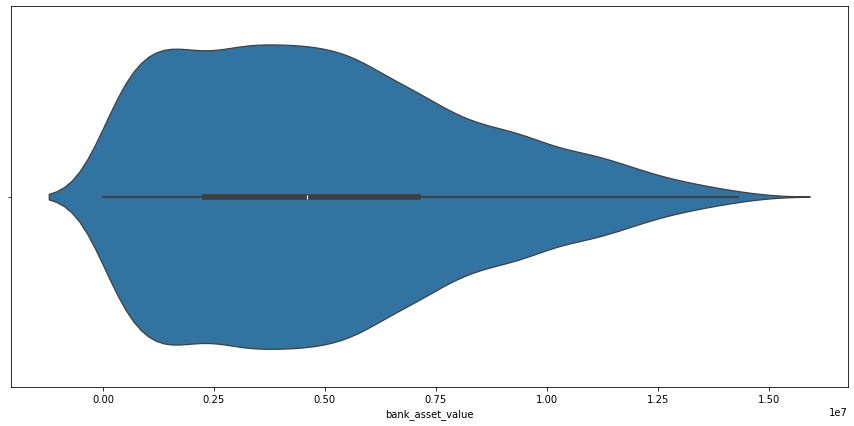

In [66]:
plt.figure(figsize=(15,7))
sb.violinplot(data=data['bank_asset_value'],orient='h')
plt.show()

### Distribution

In [67]:
alpha=0.05

# Checking normal distrabution
statistic, p_value = stats.shapiro(data['bank_asset_value'])
is_normal = p_value > alpha
if is_normal:
    print("Is a Normal")
else:
    print(" is not an normal distrabtuion ")

    
# Checking logorthemic distrabution
fit = stats.lognorm.fit(data['bank_asset_value'])
ks_statistic, p_value = stats.kstest(data['bank_asset_value'], 'lognorm', args=fit)
is_log= p_value > alpha
if is_log:
    print("Is a logorthemic distrabution")
else:
    print(" is not an logorthemic distrabtuion ")

# Checking Exponential distrabution
fit = stats.expon.fit(data['bank_asset_value'])
ks_statistic, p_value = stats.kstest(data['bank_asset_value'], 'expon', args=fit, alternative='greater')
is_expo = p_value > alpha
if is_expo:
    print("Is a expo")
else:
    print(" is not an expo distrabtuion ")

    
# Checking weibull distrabution
c, loc, scale = stats.weibull_min.fit(data['bank_asset_value'])
ks_statistic, p_value = stats.kstest(data['bank_asset_value'], 'weibull_min', args=(c, loc, scale))
is_wei = p_value > alpha
if is_wei:
    print("Is a weibull")
else:
    print(" is not an weibull distrabtuion ")

    


 is not an normal distrabtuion 
 is not an logorthemic distrabtuion 
 is not an expo distrabtuion 
 is not an weibull distrabtuion 


C:\Users\karthik\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


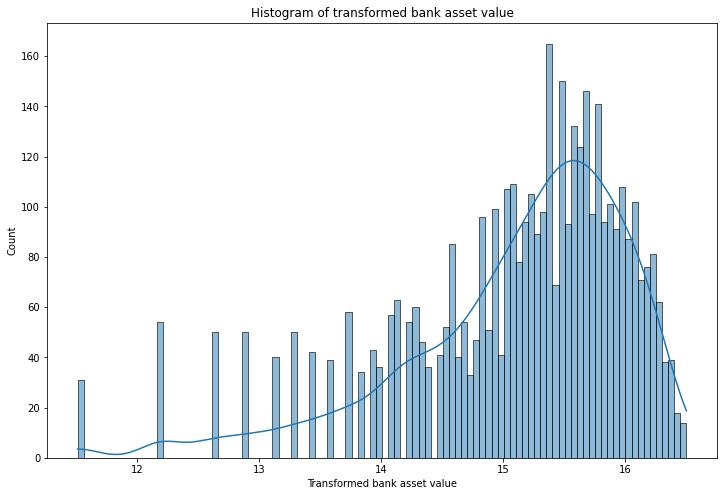

In [68]:
# Load the loan amount data
loan_amounts = data['bank_asset_value']

# Calculate the mean and standard deviation of the loan amounts
mean = np.mean(loan_amounts)
std = np.std(loan_amounts)

# Transform the loan amounts using a log transformation
transformed_loan_amounts = np.log(loan_amounts)

# Plot the transformed loan amounts
plt.figure(figsize=(12,8))
sb.histplot(data=transformed_loan_amounts,kde=True,bins=100 )
plt.xlabel("Transformed bank asset value")
plt.ylabel("Count")
plt.title("Histogram of transformed bank asset value")
plt.show()

##### bank_asset_value is not follwing any distrabution

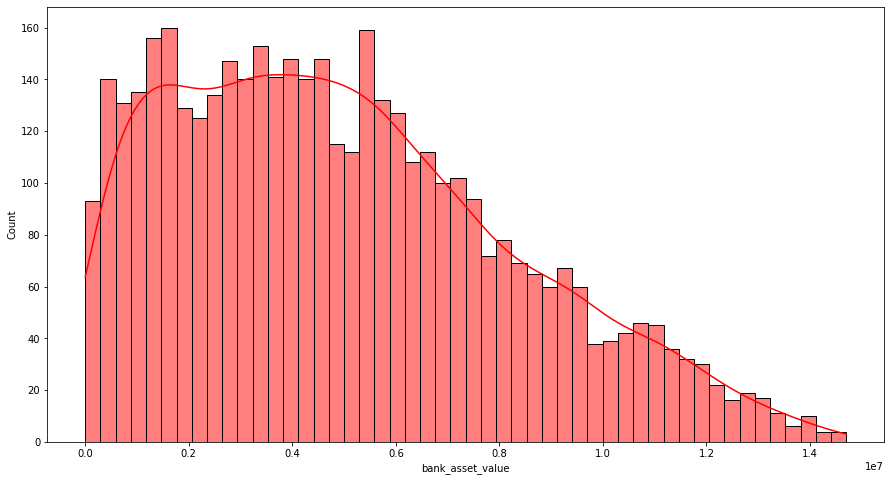

In [69]:
plt.figure(figsize=(15,8))
sb.histplot(data = bank_asst, bins =50, kde =True, color = "red")
plt.show()

##### The graph is skewed to the left, meaning that there are more banks with lower asset amounts than there are with higher asset amounts. The graph also has a long tail, meaning that there are a few banks with very high asset amounts.

# Bivariant Analysis

## 4.What is avarage income for people who are graduate and self employeed

In [70]:
data1 =data.copy()
data1['edu_selfEmployed'] = data1['education']+'_'+data1['self_employed']
data1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_selfEmployed
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Graduate_No
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Not Graduate_Yes
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Graduate_No
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Graduate_No
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Not Graduate_Yes


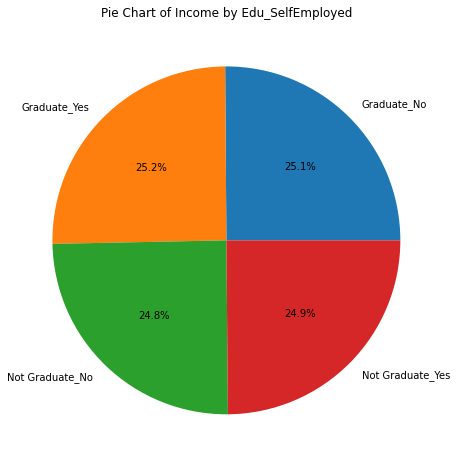

In [71]:
income = data1.groupby('edu_selfEmployed')['income_annum'].mean().reset_index()


income 

plt.figure(figsize=(14, 8))

total_income = income['income_annum'].sum()
percentage = income['income_annum'] / total_income * 100

# Create a pie chart
plt.pie(percentage, labels=income['edu_selfEmployed'], autopct='%1.1f%%')
plt.title('Pie Chart of Income by Edu_SelfEmployed')
plt.show()



Avarage Income for each groups is aproximatly equal

## 5.What is avarage Loan amount applied who are graduate and self employeed

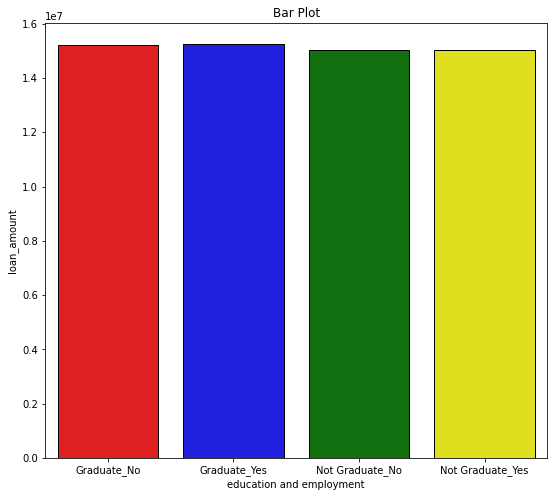

In [72]:
loan = data1.groupby('edu_selfEmployed')['loan_amount'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(9, 8))
sb.barplot(data=loan, x=loan['edu_selfEmployed'], y=loan['loan_amount'],edgecolor='black',
          hue = loan['edu_selfEmployed'],palette=['red','blue','green','yellow'])
plt.xlabel('education and employment')
plt.ylabel('loan_amount')
plt.title('Bar Plot')
plt.show()


Avarage "Loan Amount" applied from each catageory is aproximalty equal.

## 6.How is loan approval rates between self-employed and non-self-employed borrowers.


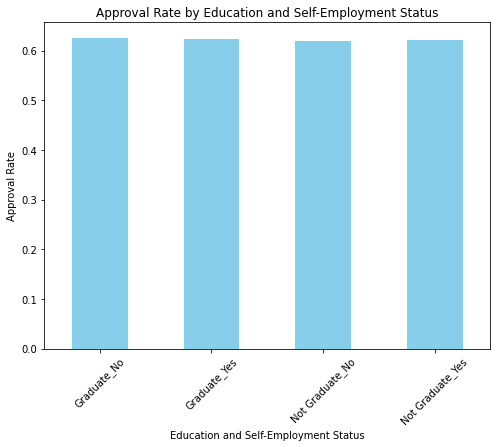

In [73]:
approval_rate_data = data1.groupby('edu_selfEmployed')['loan_status'].value_counts().reset_index()

approval_rates = approval_rate_data.pivot_table(index='edu_selfEmployed', columns='loan_status', values='count', aggfunc='sum')
approval_rates['Approval Rate'] = approval_rates['Approved'] / (approval_rates['Approved'] + approval_rates['Rejected'])

# Create a bar graph
plt.figure(figsize=(8, 6))
approval_rates['Approval Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Education and Self-Employment Status')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Education and Self-Employment Status')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

Approvel rate is aproximatly same for all the people

## 7.What is  avarage loan amount for each loan term

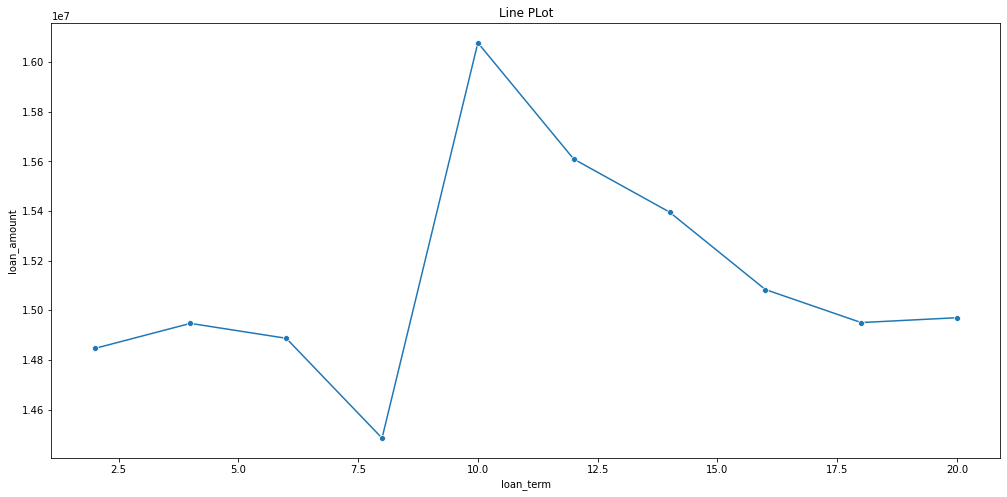

In [74]:
line = data1.groupby('loan_term')['loan_amount'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(17, 8))

x=line['loan_term']
y=line['loan_amount']

sb.lineplot(x=x, y=y, marker='o')

plt.xlabel('loan_term')
plt.ylabel('loan_amount')
plt.title('Line PLot')
plt.show()

Since it is normally distrabuted we can say that people who kept 10 years as loan term, has applied for more loan amount

## 8.  What is the average income of approved and denied loan applicants?

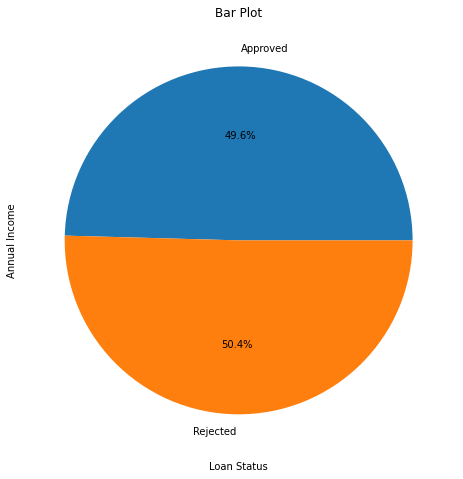

In [75]:
avg_income = data1.groupby('loan_status')['income_annum'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(9, 8))
# sb.barplot(data=avg_income,x=avg_income['loan_status'], y=avg_income['income_annum'],edgecolor='black',
#           hue=avg_income['loan_status'],palette=['yellow','g'])

total_income = avg_income['income_annum'].sum()
percentage = avg_income['income_annum'] / total_income * 100

plt.pie(percentage, labels=avg_income['loan_status'], autopct='%1.1f%%')

plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Bar Plot')
plt.show()

Avarage income of approved loan is aproximalty equal to the avarage income of denied loans.

## 9. Relation between Annual Income, Loan amount.

In [76]:
# Calculate monthly income
data1['monthly_income'] = data1['income_annum'] / 12

# Calculate monthly loan payment
data1['monthly_payment'] = data1['loan_amount'] * data1['loan_term'] / 1200

# Calculate debt-to-income ratio
data1['debt_to_income'] = data1['monthly_payment'] / data1['monthly_income']

data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_selfEmployed,monthly_income,monthly_payment,debt_to_income
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Graduate_No,800000.000000,299000.000000,0.373750
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Not Graduate_Yes,341666.666667,81333.333333,0.238049
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Graduate_No,758333.333333,495000.000000,0.652747
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Graduate_No,683333.333333,204666.666667,0.299512
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Not Graduate_Yes,816666.666667,403333.333333,0.493878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Graduate_Yes,83333.333333,23000.000000,0.276000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Not Graduate_Yes,275000.000000,188333.333333,0.684848
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Not Graduate_No,541666.666667,358500.000000,0.661846
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Not Graduate_No,341666.666667,85333.333333,0.249756


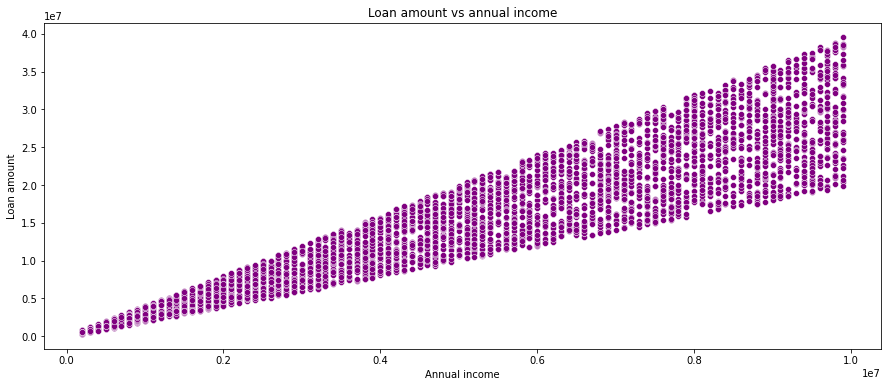

In [77]:
# Plot loan amount vs annual income
plt.figure(figsize=(15, 6))
sb.scatterplot(data=data1,x=data1['income_annum'], y=data1['loan_amount'],color='purple')
plt.xlabel('Annual income')
plt.ylabel('Loan amount')
plt.title('Loan amount vs annual income')
plt.show()

People with more annual income had applied for more loan amount.<br>
This means annual income and loan amount is positivly correlated

## 10. Relation between debt-to-income ratio and loan status

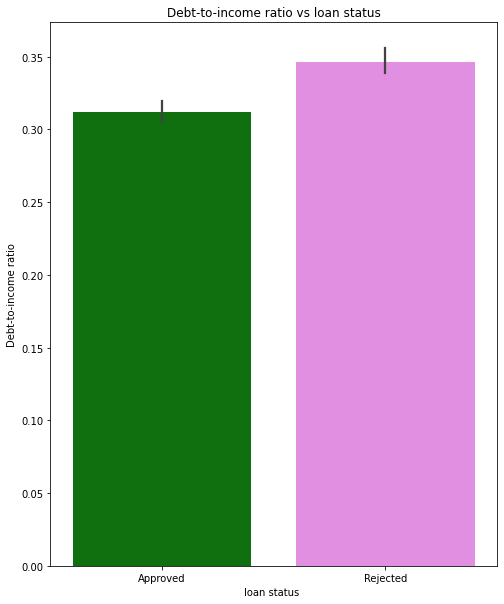

In [78]:
# Plot debt-to-income ratio vs loan statustatus
plt.figure(figsize=(8, 10))
sb.barplot(data=data1,x=data1['loan_status'],y= data1['debt_to_income'], 
           hue = data1['loan_status'],palette=['green','violet'])
plt.xlabel('loan status ')
plt.ylabel('Debt-to-income ratio')
plt.title('Debt-to-income ratio vs loan status')
plt.show()

If debt to income ratio is more then chances of rejecting the loan is more.

## 11. what is the avarage cibil score for loan status.

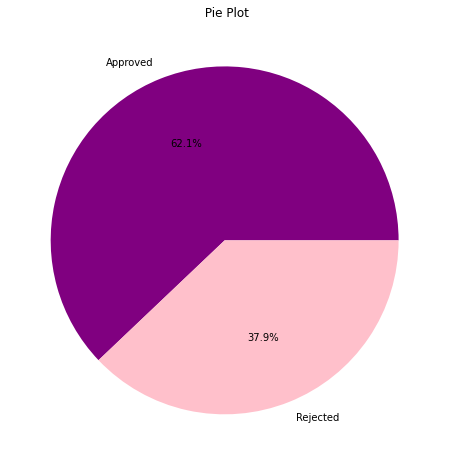

In [79]:
cibil = data1.groupby('loan_status')['cibil_score'].mean().reset_index()


total_cibil = cibil['cibil_score'].sum()
percentage = cibil['cibil_score'] / total_cibil * 100
plt.figure(figsize=(16, 8))
plt.pie(percentage, labels=cibil['loan_status'], autopct='%1.1f%%',colors=['purple','pink'])

plt.title(' Pie Plot')

plt.show()

Cibil score for approved loan is greater than avarage Cibil score for rejected loan .<br>
Therefore, More cibil score then chance of approving the loan in greater.

## 12. What is the correlation between total bank asset value and loan amount approved and rejected?

In [80]:
data1['Total_assets']=data1['residential_assets_value']+data1['commercial_assets_value']+data1['luxury_assets_value']+data1['bank_asset_value']
data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_selfEmployed,monthly_income,monthly_payment,debt_to_income,Total_assets
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Graduate_No,800000.000000,299000.000000,0.373750,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Not Graduate_Yes,341666.666667,81333.333333,0.238049,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Graduate_No,758333.333333,495000.000000,0.652747,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Graduate_No,683333.333333,204666.666667,0.299512,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Not Graduate_Yes,816666.666667,403333.333333,0.493878,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Graduate_Yes,83333.333333,23000.000000,0.276000,7400000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Not Graduate_Yes,275000.000000,188333.333333,0.684848,20000000
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Not Graduate_No,541666.666667,358500.000000,0.661846,39000000
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Not Graduate_No,341666.666667,85333.333333,0.249756,28800000


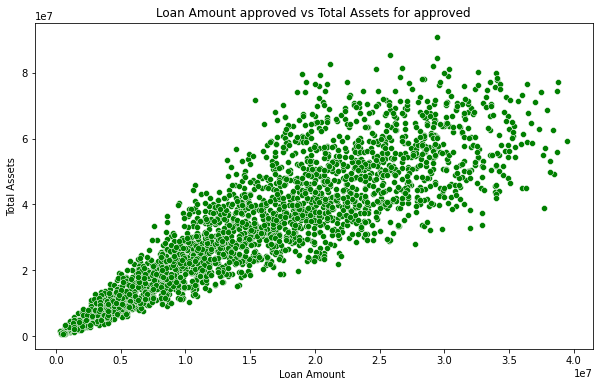

In [81]:
approved_loan = data1[data1['loan_status'] =='Approved']

plt.figure(figsize=(10, 6))
sb.scatterplot(data=approved_loan,x= approved_loan['loan_amount'], y=approved_loan['Total_assets'],color='green')
plt.xlabel('Loan Amount ')
plt.ylabel('Total Assets')
plt.title('Loan Amount approved vs Total Assets for approved')

plt.show()

There is a positive corelation between loan amount and total bank assets 


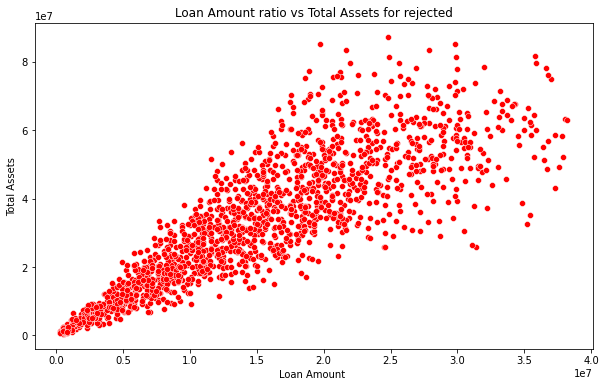

In [82]:
rejected_loan = data1[data1['loan_status'] =='Rejected']


plt.figure(figsize=(10, 6))
sb.scatterplot(data=rejected_loan, x=rejected_loan['loan_amount'], y=rejected_loan['Total_assets'],color='red')
plt.xlabel('Loan Amount ')
plt.ylabel('Total Assets')
plt.title('Loan Amount ratio vs Total Assets for rejected')
plt.show()


For both approved and rejected loans bank assets and loan amount applied are positively corelated.

### How annual income is related with luxury assesrts value

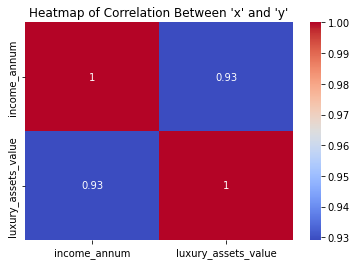

In [83]:
Bivariant_analysis=data[['income_annum','luxury_assets_value']]
Bivariant_analysis
corr = Bivariant_analysis.corr()
# Create a DataFrame
df = pd.DataFrame(data)

# Create a heatmap
sb.heatmap(corr, annot=True, cmap='coolwarm')

# Customize the plot (optional)
plt.title("Heatmap of Correlation Between 'x' and 'y'")
plt.show()


## 13.Relation between Cibil score and Total assets value

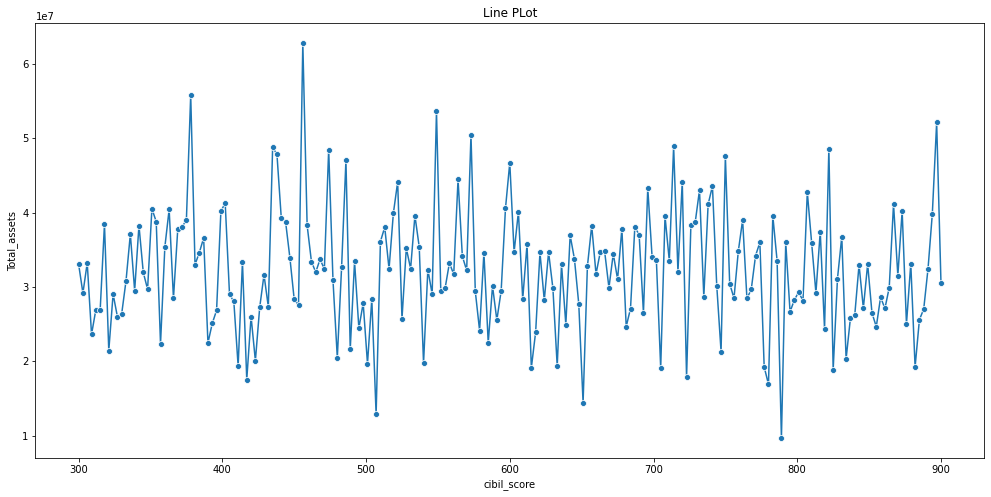

In [84]:
assets_cibil = data1.groupby('cibil_score')['Total_assets'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(17, 8))

x=assets_cibil['cibil_score'].iloc[::3]
y=assets_cibil['Total_assets'].iloc[::3]

sb.lineplot(x=x, y=y, marker='o')

plt.xlabel('cibil_score')
plt.ylabel('Total_assets')
plt.title('Line PLot')
plt.show()

- There is a negative relation between them.
- Here if bank assets values is high then cibilscore  is less the 
- And if bank assets value is less then cibil score is good

## 14. Relaiton between debt to income ratio and cibil score

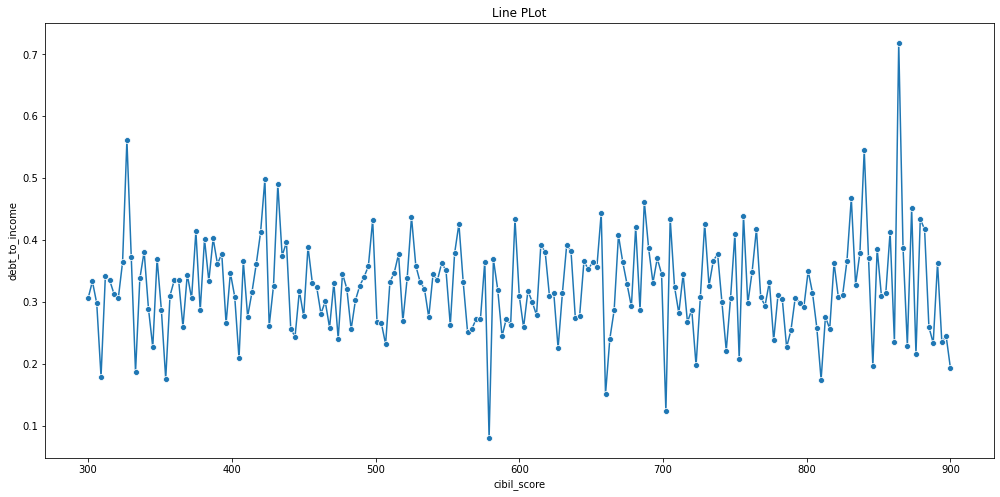

In [85]:
debt_cibil = data1.groupby('cibil_score')['debt_to_income'].mean().reset_index()

debt_cibil


plt.figure(figsize=(17, 8))

x=debt_cibil['cibil_score'].iloc[::3]
y=debt_cibil['debt_to_income'].iloc[::3]

sb.lineplot(x=x, y=y, marker='o')

plt.xlabel('cibil_score')
plt.ylabel('debt_to_income')
plt.title('Line PLot')
plt.show()

From this if debt to income ratio increses then cibil score will reduces

## 15. In each loan term (2,4,6...) and how many Approved,Rejected and total loans it has

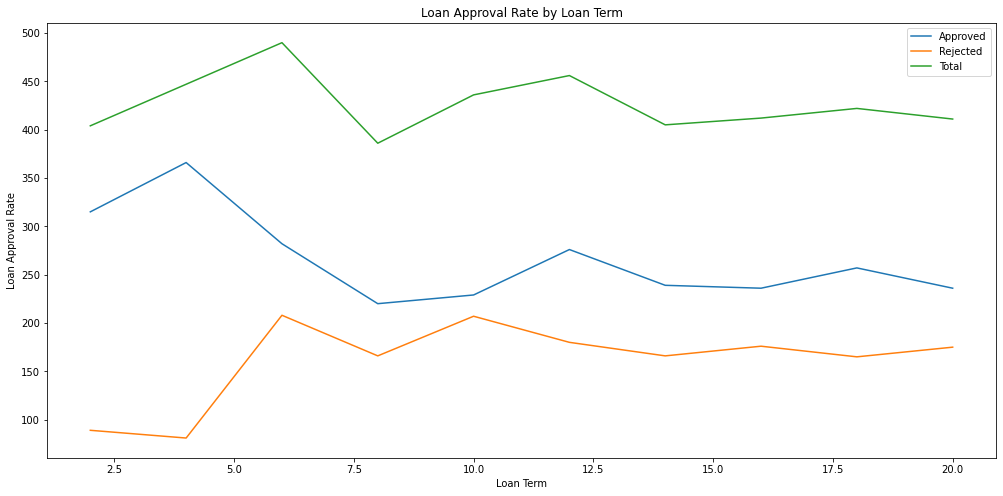

In [86]:
plt.figure(figsize=(17, 8))

df_cross_loan_term = pd.crosstab(index = data1['loan_term'], columns = data1['loan_status'])

df_cross_loan_term['total'] = df_cross_loan_term['Approved'] + df_cross_loan_term['Rejected']

# Create a line plot
sb.lineplot(x = df_cross_loan_term.index, y = 'Approved', data = df_cross_loan_term, label = 'Approved')
sb.lineplot(x = df_cross_loan_term.index, y = 'Rejected', data = df_cross_loan_term, label = 'Rejected')
sb.lineplot(x = df_cross_loan_term.index, y = 'total', data = df_cross_loan_term, label = 'Total')

# Add a title and axis labels
plt.title('Loan Approval Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Approval Rate')

# Show the plot
plt.show()

In [87]:
df_cross_loan_term

loan_status,Approved,Rejected,total
loan_term,,,
2,315,89,404
4,366,81,447
6,282,208,490
8,220,166,386
10,229,207,436
12,276,180,456
14,239,166,405
16,236,176,412
18,257,165,422


## 16. Relation between loan approvel and number of dependents

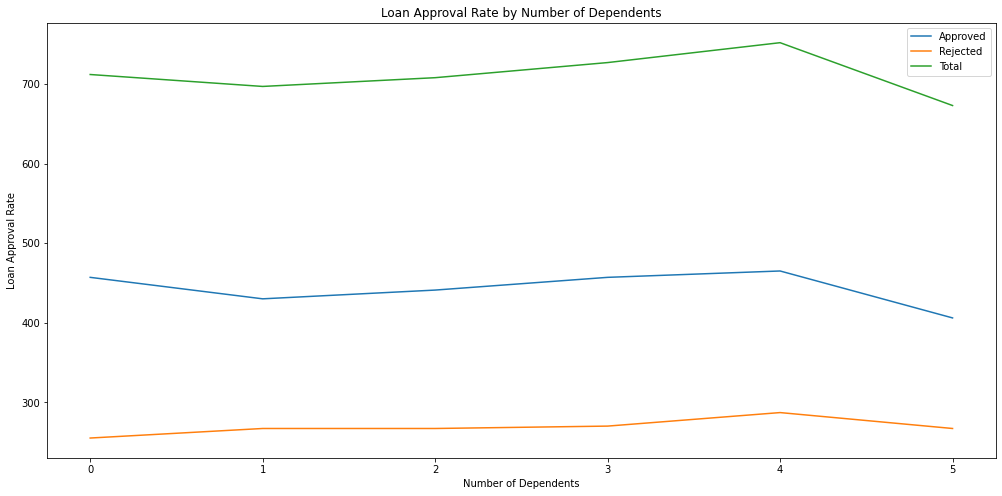

In [88]:
plt.figure(figsize=(17, 8))

df_cross_no_of_dependents = pd.crosstab(index = data1['no_of_dependents'], columns = data1['loan_status'])
df_cross_no_of_dependents['total'] = df_cross_no_of_dependents['Approved'] + df_cross_no_of_dependents['Rejected']


# Create a line plot
sb.lineplot(x = df_cross_no_of_dependents.index, y = 'Approved', data = df_cross_no_of_dependents, label = 'Approved')
sb.lineplot(x = df_cross_no_of_dependents.index, y = 'Rejected', data = df_cross_no_of_dependents, label = 'Rejected')
sb.lineplot(x = df_cross_no_of_dependents.index, y = 'total', data = df_cross_no_of_dependents, label = 'Total')

# Add a title and axis labels
plt.title('Loan Approval Rate by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Approval Rate')

# Show the plot
plt.show()

## 17. How differnet assests values varies with loan status

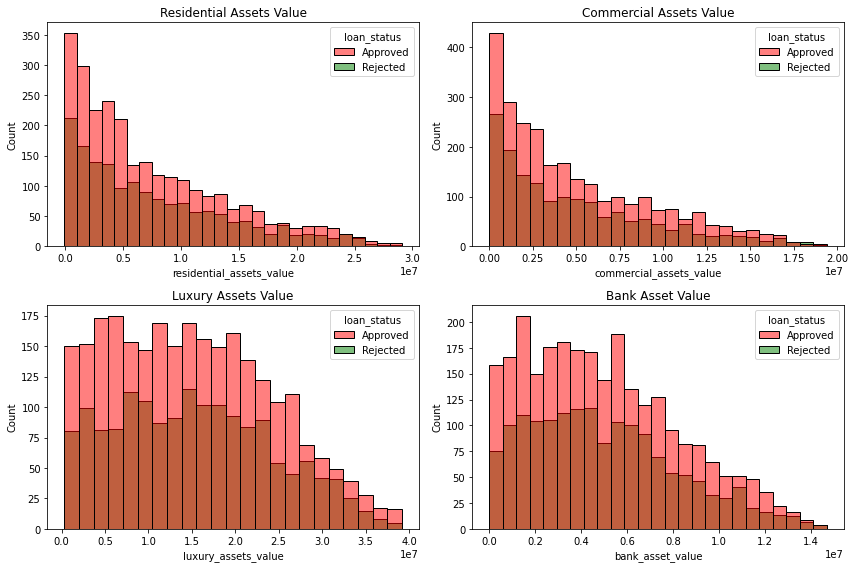

In [89]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the histogram of residential assets value
sb.histplot(
    data=data1,
    x="residential_assets_value",
    hue="loan_status",
    ax=axes[0, 0],
    element="bars",
    palette=["red", "green"],
)
axes[0, 0].set_title("Residential Assets Value")

# Plot the histogram of commercial assets value
sb.histplot(
    data=data1,
    x="commercial_assets_value",
    hue="loan_status",
    ax=axes[0, 1],
    element="bars",
    palette=["red", "green"],
)
axes[0, 1].set_title("Commercial Assets Value")

# Plot the histogram of luxury assets value
sb.histplot(
    data=data1,
    x="luxury_assets_value",
    hue="loan_status",
    ax=axes[1, 0],
    element="bars",
    palette=["red", "green"],
)
axes[1, 0].set_title("Luxury Assets Value")

# Plot the histogram of bank asset value
sb.histplot(
    data=data1,
    x="bank_asset_value",
    hue="loan_status",
    ax=axes[1, 1],
    element="bars",
    palette=["red", "green"],
)
axes[1, 1].set_title("Bank Asset Value")

# Adjust the subplot layout
fig.tight_layout()

# Show the plot
plt.show()


## 18. How Annual income is related to different assets value

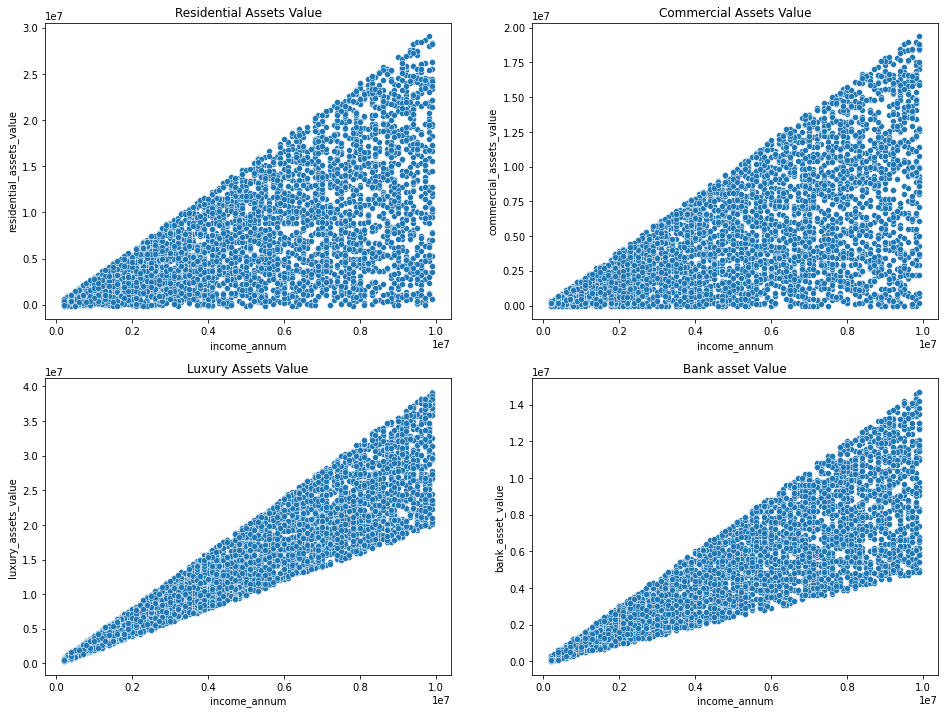

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#  residential_assets_value	commercial_assets_value	luxury_assets_value	bank_asset_value

sb.scatterplot(data=data1, x='income_annum', y='residential_assets_value',ax=axes[0, 0])
axes[0, 0].set_title("Residential Assets Value")

sb.scatterplot(data=data1, x='income_annum', y='commercial_assets_value',ax=axes[0, 1])
axes[0, 1].set_title("Commercial Assets Value")


sb.scatterplot(data=data1, x='income_annum', y='luxury_assets_value',ax=axes[1, 0],)
axes[1, 0].set_title("Luxury Assets Value")


sb.scatterplot(data=data1, x='income_annum', y='bank_asset_value',ax=axes[1, 1],)
axes[1, 1].set_title("Bank asset Value")
plt.show()


## 19.How no_of_dependents influence loan amount

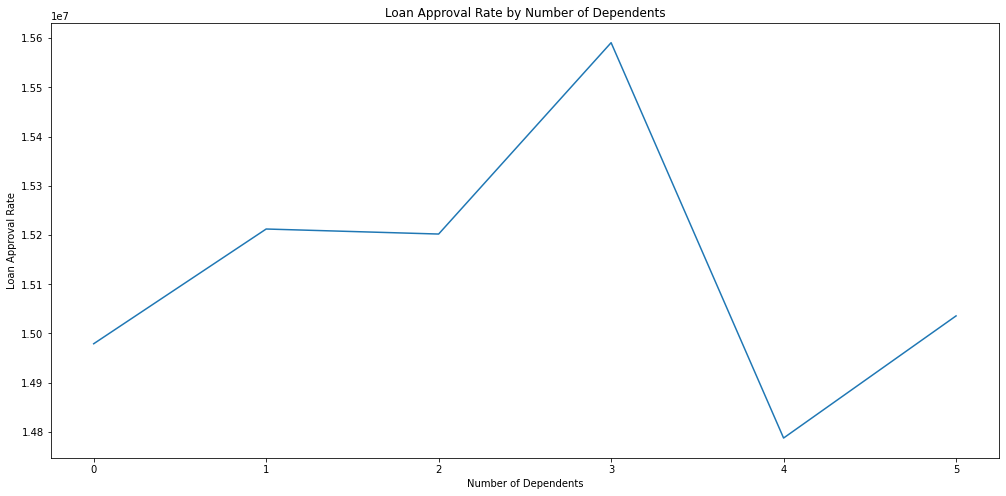

In [91]:
plt.figure(figsize=(17, 8))
no_of_dependents_amount = data1.groupby('no_of_dependents')['loan_amount'].mean().reset_index()

# Create a line plot
sb.lineplot(data=no_of_dependents_amount, x='no_of_dependents', y='loan_amount')

# Rotate the x-axis labels to prevent overlapping

# Add a title and axis labels
plt.title('Loan Approval Rate by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Approval Rate')

# Show the plot
plt.show()

# Annual Income Vs Loan Amount Vs Total Assets

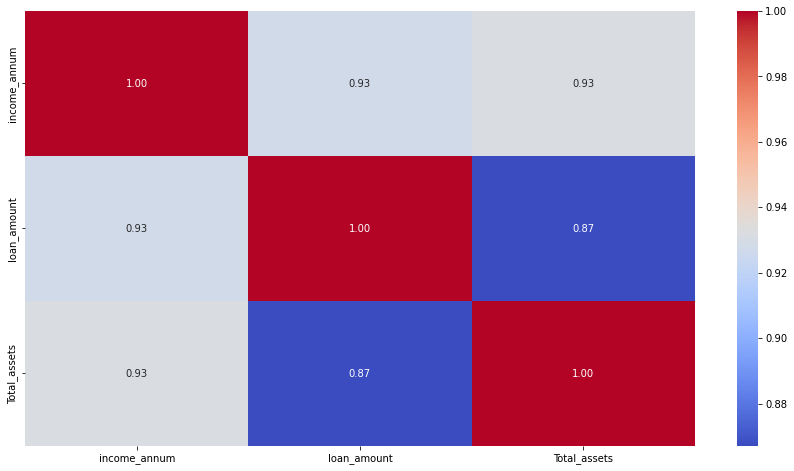

In [92]:

# Create a pandas DataFrame
df = data1[['income_annum','loan_amount','Total_assets']]

# Create the correlation matrix

plt.figure(figsize=(15,8))
correlation_matrix = df.corr()

# Create the heatmap
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


## 20.Corelation between Each columns

In [93]:
data2=data[['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']]
data2
loan_corr = data2.corr()

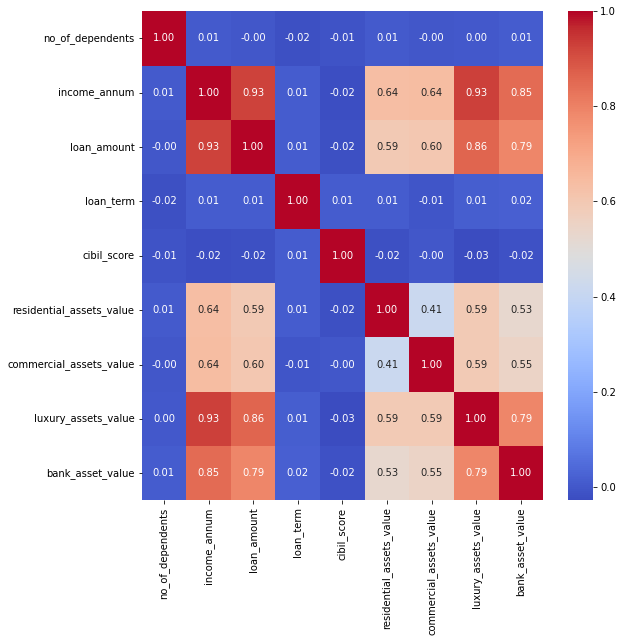

In [94]:
plt.figure(figsize=(9,9))
sb.heatmap(loan_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

- variable that affects the loan_status the most is cibil_score.
- no variable that has a linear relationship with the education and self_employed.
- there are strong linear relationship between income_annum & loan_amount, luxury_assets_value & income_annum, bank_asset_value & income_annum and luxury_assets_value & bank_asset_value

In [95]:
data4=data[['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value']]
data4

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value
0,2,9600000,29900000,12,778,2400000
1,0,4100000,12200000,8,417,2700000
2,3,9100000,29700000,20,506,7100000
3,3,8200000,30700000,8,467,18200000
4,5,9800000,24200000,20,382,12400000
...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000
4265,0,3300000,11300000,20,559,4200000
4266,2,6500000,23900000,18,457,1200000
4267,1,4100000,12800000,8,780,8200000


<Figure size 864x576 with 0 Axes>

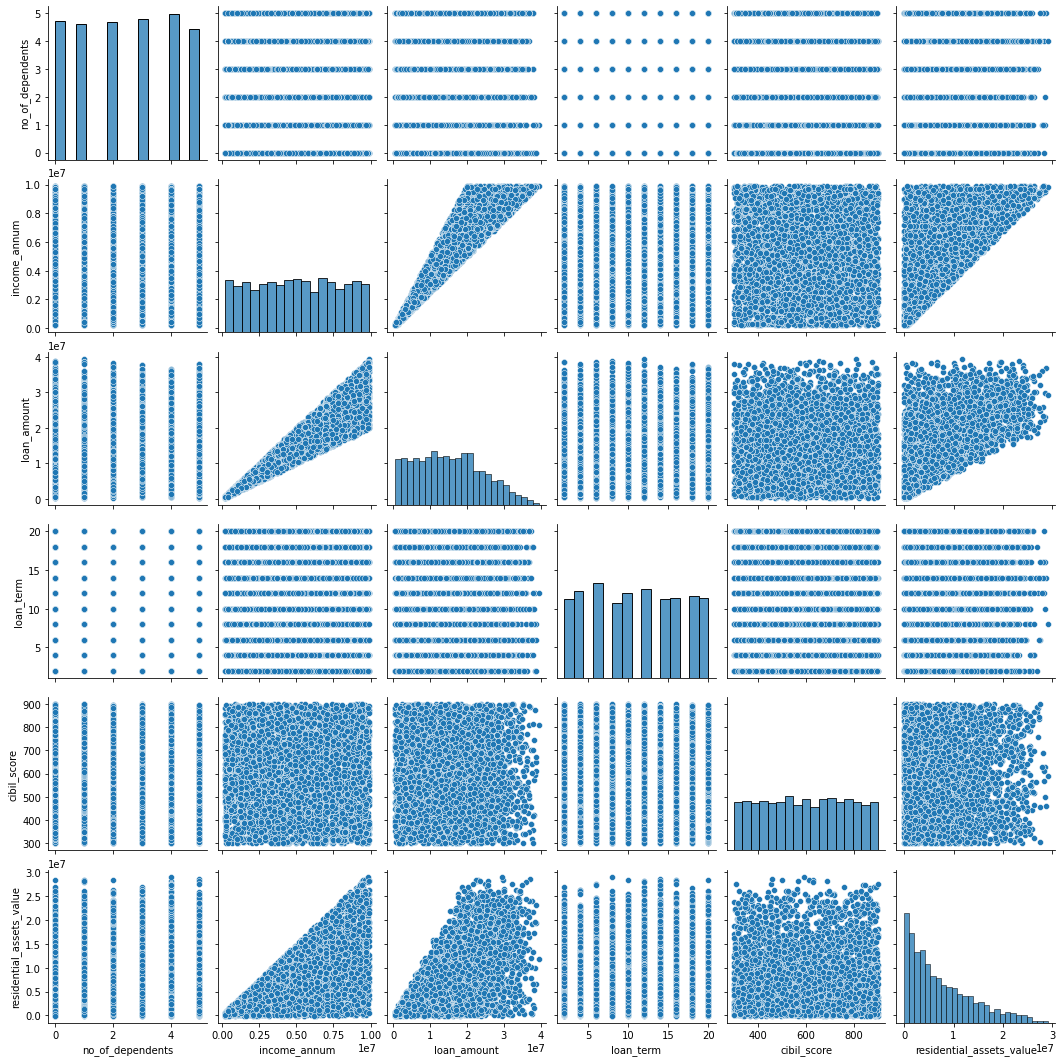

In [96]:
plt.figure(figsize=(12,8))
sb.pairplot(data4)
plt.show()


# Hypothesis Testing

In [97]:
# 1) Find avarege debt to income ratio. check if DTI ratio is less then avag then loan if accpeted(generally).
# 2) if DTI ratio is less and cibli is more then loan is accpeted(generally).
# 3) if DTI ratio more and loan amount more then loan is rejected(generally).
# 4) If total bank assets are more then laon is appcepted or rejected?

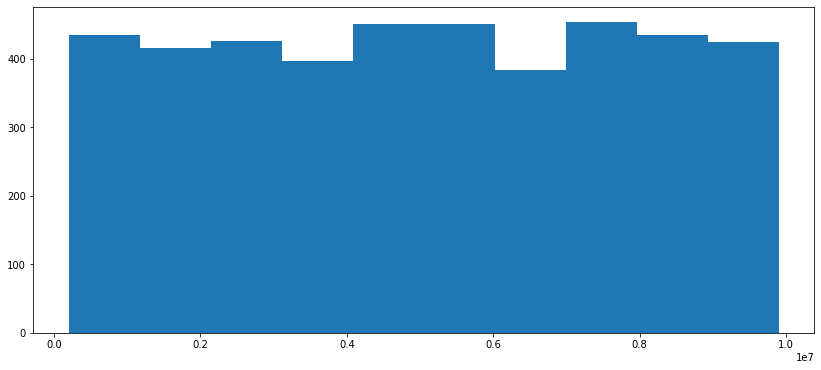

In [98]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(data.income_annum)
pyplot.show()

In [99]:
data1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_selfEmployed,monthly_income,monthly_payment,debt_to_income,Total_assets
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Graduate_No,800000.000000,299000.000000,0.373750,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Not Graduate_Yes,341666.666667,81333.333333,0.238049,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Graduate_No,758333.333333,495000.000000,0.652747,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Graduate_No,683333.333333,204666.666667,0.299512,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Not Graduate_Yes,816666.666667,403333.333333,0.493878,55000000


In [100]:
## Hypothesis test to check weather income_annum is following normal distribution or not

In [101]:
import numpy as np
from scipy.stats import shapiro

dataToTest = data.income_annum
stat, p = shapiro(dataToTest)
print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
    print("Normal Distribution")
else:
    print("Not a normal distribution")

stat=0.96, p=0.000000000000000000000000000000
Not a normal distribution


In [102]:
data.shape

(4269, 13)

In [103]:
import numpy as np
import statsmodels.stats.weightstats as sw

# Define the null and alternative hypotheses.
null_hypothesis = 700
alternative_hypothesis = "larger"

# Filter the data to only include people who got loan approved.
approved_loan_data = data[data['loan_status'] == 'Approved']

# Calculate the average cibil score for people who got loan approved.
approved_loan_cibil_score_mean = approved_loan_data['cibil_score'].mean()

# Calculate the standard deviation of the cibil scores for people who got loan approved.
approved_loan_cibil_score_std = approved_loan_data['cibil_score'].std()

# Calculate the z-statistic.
z_statistic = (approved_loan_cibil_score_mean - null_hypothesis) / (approved_loan_cibil_score_std / np.sqrt(len(approved_loan_data)))

# Calculate the p-value.
p_value = sw.ztest(approved_loan_data['cibil_score'], value=null_hypothesis, alternative=alternative_hypothesis)

# Print the results of the z-test.
print('z-statistic:', z_statistic)
print('p-value:', p_value)


z-statistic: 1.4245030217545502
p-value: (1.4245030217545502, 0.07715045548721576)


In [104]:
if p_value[1] < 0.05:
    print("Null hypothesis is accepted.  We can say that average cibil score is 700")
else:
    print("Reject Null hypothesis and say that average cibil score is greater than 700")

Reject Null hypothesis and say that average cibil score is greater than 700


In [105]:
df = pd.read_csv('loan_approval_dataset.csv')

In [106]:
## F-test

In [107]:
from scipy import stats

Income_annum_Approved= data1[data1['loan_status'] == 1]['income_annum']
Income_annum_Rejected= data1[data1['loan_status'] == 0]['income_annum']

t_stat_Income_annum, p_val_Income_annum = stats.ttest_ind(Income_annum_Approved, Income_annum_Rejected)

print(f"F-statistict Income_annum: {t_stat_Income_annum}")
print(f"P-value Income_annum: {p_val_Income_annum}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

F-statistict Income_annum: nan
P-value Income_annum: nan
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)


In [108]:

loan_amount_Approved= data1[data1['loan_status'] == 1]['loan_amount']
loan_amount_Rejected= data1[data1['loan_status'] == 0]['loan_amount']

t_stat_loan_amount, p_val_loan_amount = stats.ttest_ind(loan_amount_Approved, loan_amount_Rejected)

print(f"F-statistic loan_amount: {t_stat_loan_amount}")
print(f"P-value loan_amount: {p_val_loan_amount}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

F-statistic loan_amount: nan
P-value loan_amount: nan
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)


## Debt to income ratio and loan status.

In [126]:
approved_loans = data1[data1['loan_status']=='Approved']
approved_loans['debt_to_income']

0       0.373750
6       0.151724
8       0.550000
10      0.077241
13      0.484615
          ...   
4261    0.150000
4263    0.355600
4265    0.684848
4267    0.249756
4268    0.322826
Name: debt_to_income, Length: 2656, dtype: float64

In [143]:
round(approved_loans['debt_to_income'].mean(),2)

0.31

In [128]:
Rejected_loans = data1[data1['loan_status']=='Rejected']
Rejected_loans['debt_to_income']

1       0.238049
2       0.652747
3       0.299512
4       0.493878
5       0.281250
          ...   
4258    0.372784
4259    0.357778
4262    0.461538
4264    0.276000
4266    0.661846
Name: debt_to_income, Length: 1613, dtype: float64

In [142]:
round(Rejected_loans['debt_to_income'].mean(),2)

0.35

In [146]:
Rejected_loans['debt_to_income'].mode()

0    0.24
Name: debt_to_income, dtype: float64

In [140]:
round(data1['debt_to_income'].mean(),2)

0.33

In [260]:
import numpy as np
import statsmodels.stats.weightstats as sw

# Define the null and alternative hypotheses.
null_hypothesis = 0.31
alternative_hypothesis = "smaller"

# Filter the data to only include people who got loan approved.
approved_loan_data = data1[data1['loan_status'] == 'Approved']

# Calculate the average debt_to_income for people who got loan approved.
approved_loan_dti_mean = approved_ loan_data['debt_to_income'].mean()

# Calculate the standard deviation of the debt_to_income for people who got loan approved.
approved_loan_dti_std = approved_loan_data['debt_to_income'].std()

# Calculate the z-statistic.
z_statistic = (approved_loan_dti_mean - null_hypothesis) / (approved_loan_dti_std / np.sqrt(len(approved_loan_data)))

# Calculate the p-value.
p_value = sw.ztest(approved_loan_data['debt_to_income'], value=null_hypothesis, alternative=alternative_hypothesis)

# Print the results of the z-test.
print('z-statistic:', z_statistic)
print('p-value:', p_value)


z-statistic: 0.612587806943453
p-value: (0.6125878069434537, 0.7299255387581227)


In [261]:
if p_value[1] < 0.05:
    print("Null hypothesis is accepted.  We can say that average debt to income is 0.32")
else:
    print("Reject Null hypothesis and say that average debt to income is less than 0.32")

Reject Null hypothesis and say that average debt to income is less than 0.32


In [144]:
approved_loans = data1[data1['loan_status']=='Approved']
approved_loans['debt_to_income']

0       0.373750
6       0.151724
8       0.550000
10      0.077241
13      0.484615
          ...   
4261    0.150000
4263    0.355600
4265    0.684848
4267    0.249756
4268    0.322826
Name: debt_to_income, Length: 2656, dtype: float64

In [154]:
approved_loans['debt_to_income'].mode()

0.03333333333333333

In [158]:
count = approved_loans[approved_loans['debt_to_income']==0.12]
count['loan_id'].count()

15

In [238]:
range_count = approved_loans[approved_loans['debt_to_income'] < 0.32]

In [239]:
# 2656
range_count['loan_id'].count()

1432

In [240]:
(range_count['loan_id'].count()/2656)*100

53.915662650602414

In [229]:
Rejected_loans = data1[data1['loan_status']=='Rejected']
Rejected_loans['debt_to_income']

1       0.238049
2       0.652747
3       0.299512
4       0.493878
5       0.281250
          ...   
4258    0.372784
4259    0.357778
4262    0.461538
4264    0.276000
4266    0.661846
Name: debt_to_income, Length: 1613, dtype: float64

In [185]:
count = Rejected_loans[Rejected_loans['debt_to_income']==0.24]
count['loan_id'].count()

11

In [243]:
range_count = Rejected_loans[Rejected_loans['debt_to_income'] <0.32]
range_count.count()

loan_id                     757
no_of_dependents            757
education                   757
self_employed               757
income_annum                757
loan_amount                 757
loan_term                   757
cibil_score                 757
residential_assets_value    757
commercial_assets_value     757
luxury_assets_value         757
bank_asset_value            757
loan_status                 757
edu_selfEmployed            757
monthly_income              757
monthly_payment             757
debt_to_income              757
Total_assets                757
dtype: int64

In [244]:
(range_count['loan_id'].count()/1613)*100

46.93118412895226

In [190]:
Rejected_loans.shape

(1613, 18)

In [191]:
1613-1114

499

In [166]:
data1[data1['debt_to_income'].between(0.05,0.24)].count()

loan_id                     1498
no_of_dependents            1498
education                   1498
self_employed               1498
income_annum                1498
loan_amount                 1498
loan_term                   1498
cibil_score                 1498
residential_assets_value    1498
commercial_assets_value     1498
luxury_assets_value         1498
bank_asset_value            1498
loan_status                 1498
edu_selfEmployed            1498
monthly_income              1498
monthly_payment             1498
debt_to_income              1498
Total_assets                1498
dtype: int64